<a href="https://colab.research.google.com/github/DavidScanu/oc-ai-engineer-p04-scoring/blob/main/p04_scanu_david_01_notebook_eda_2024_11_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/DavidScanu/oc-ai-engineer-p04-scoring/refs/heads/main/images/oc-banner-project-04-1660-v1.png" />

# Projet 4 - Construisez un modèle de scoring (Partie 1)

> 🎓 OpenClassrooms • Parcours [AI Engineer](https://openclassrooms.com/fr/paths/795-ai-engineer) | 👋 *Etudiant* : [David Scanu](https://www.linkedin.com/in/davidscanu14/)

## 📝 Contexte

Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas d'historique de prêt. Pour accorder un crédit à la consommation, l’entreprise souhaite **mettre en œuvre un outil de “scoring crédit”** qui calcule la probabilité qu’un client le rembourse ou non, puis classifie la demande : crédit accordé ou refusé. Les chargés de relation client seront les utilisateurs de l’outil de scoring et ont besoin que le modèle soit facilement interprétable, avec une mesure de l’importance des variables influençant la décision.

## ⚡ Mission

>  Développer un outil de **scoring crédit** qui calcule la probabilité qu’un client le rembourse ou non, puis classifie la demande : **crédit accordé** ou **refusé**.

Le modèle doit être :
- **Interprétable** par les équipes qui vont l’utiliser
- Disposer d’une **mesure de l’importance des variables**
- Prendre en compte le **déséquilibre entre le nombre de bons et de moins bons clients**
- Prendre en compte le **coût métier** entre un faux négatif (FN) et un faux positif (FP)

## 💾 Jeux de données

Les données sont fournies par **Home Credit**, un service dédié à l'octroi de lignes de crédit (prêts) à la population non bancarisée.

Pour réaliser ce modèle, [un jeu de données](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip) contenant :

- un historique de prêts,
- un historique d’informations financières,
- des informations sur le comportement des emprunteurs (si l’emprunteur a fait défaut ou pas).

Les descriptions des colonnes du jeu de données sont disponibles ici : [p04-HomeCredit_columns_description | Google Sheet](https://docs.google.com/spreadsheets/d/1xHunq-9huLdwsmxzcC0foqXvP35-Riy_PlqViogj6wk/edit?usp=sharing)

## Etapes

- Étape 1 - Choisissez un kernel et effectuez un analyse exploratoire
- Étape 2 - Définissez une métrique adaptée à la problématique métier
- Étape 3 - Optimisation et évaluation des modèles de Machine Learning
- Étape 4 - Développez un module d’explicabilité de votre modèle de Machine Learning

## 🎯 Objectifs pédagogiques

- Créer les variables pertinentes d'un modèle d'apprentissage supervisé ou non-supervisé
- Évaluer les performances des modèles d’apprentissage supervisé selon différents critères
- Sélectionner et entraîner des modèles d’apprentissage supervisé

## 📊 Présentation

- Compréhension de la problématique métier
- Description du jeu de données
- Transformation du jeu de données (nettoyage et feature engineering)
- Comparaison et synthèse des résultats pour les modèles utilisés
- Interprétabilité du modèle
- Conclusion

## 📦 Livrables

- Un **Jupyter Notebook** d'analyse exploratoire et de feature engineering
- Un **Jupyter Notebook** présentant les différentes parties de votre travail de modélisation
- Une présentation (Google Slide)

## 🙋‍♂️ Soutenance

- **Présentation** (20 minutes)
  - Rappel de la problématique, présentation du jeu de données et analyse exploratoire (5 minutes).
  - Présentation de votre approche méthodologique et de la synthèse des résultats (15 minutes).
- **Discussion** (5 minutes)
  - L’évaluateur, jouant le rôle de Michaël, vous challengera sur vos choix.
- **Débriefing** (5 minutes)
  - À la fin de la soutenance, l'évaluateur arrêtera de jouer le rôle de Michaël pour vous permettre de débriefer ensemble.

## ⚙️ Installation et importation des bibliothèques nécessaires

In [ ]:
import sklearn
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st # perform correlation calculation
import plotly.express as px

In [ ]:
# Apply the default theme for seaborn
sns.set_theme()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## ⭐ Etapes typiques d'un projet de data science

<img src="https://raw.githubusercontent.com/ashishpatel26/Amazing-Feature-Engineering/refs/heads/master/images/workflow2.png" />

1. **Analyse exploratoire des données (EDA):**
   * Visualisation des données (histogrammes, boxplots, nuages de points).
   * Calcul des statistiques descriptives (moyenne, médiane, écart-type, corrélations).
   * Identification des relations entre les variables.
   * Détection des anomalies.

2. **Nettoyage et formatage des données:**
   * Identification et correction des erreurs (valeurs aberrantes, doublons, incohérences).

3. **Ingénierie des caractéristiques:**
   * Création de nouvelles variables pertinentes (interactions, transformations).
   * Sélection des variables (Feature selection) : Sélection manuelle, méthodes statistiques, méthodes basées sur l'apprentissage.

4. **Preprocessing**
   * Normalisation ou standardisation des données numériques (gestion des outliers).
   * Conversion des variables catégorielles en format numérique (encodage one-hot, label encoding).
   * Gestion des valeurs manquantes (suppression, imputation, création d'une catégorie spécifique).

5. **Sélection de modèle:**
   * Choix d'une variété de modèles d'apprentissage automatique (régression linéaire, forêts aléatoires, réseaux de neurones, etc.).
   * Entraînement des modèles sur les données d'entraînement.

6. **Évaluation des modèles:**
   * Choix d'une métrique de performance appropriée (MSE, RMSE, accuracy, F1-score, etc.).
   * Comparaison des performances des modèles sur un ensemble de validation.

7. **Ajustement des hyperparamètres:**
   * Utilisation de techniques d'optimisation (grid search, random search, optimisation bayésienne).
   * Recherche des meilleurs paramètres pour le modèle sélectionné.

8. **Évaluation finale:**
   * Évaluation du modèle final sur l'ensemble de test pour une évaluation plus réaliste.

9. **Interprétation des résultats:**
   * Analyse de l'importance des caractéristiques.
   * Explication des prédictions du modèle.
   * Identification des biais potentiels.

9. **Conclusion et documentation:**
   * Rédaction d'un rapport clair et concis présentant les résultats.
   * Visualisation des résultats clés.
   * Conservation du code et des données pour une reproductibilité future.

## 🥗 Jeu de données

Il existe 7 sources de données différentes :

- **application_train/application_test** : Les principales données d'entraînement et de test contenant des informations sur chaque demande de prêt à Home Credit. Chaque prêt possède sa propre ligne et est identifié par la variable `SK_ID_CURR`. Les données d'entraînement de la demande sont fournies avec la cible `TARGET` indiquant 0 : le prêt a été remboursé, 1 : le prêt n'a pas été remboursé.
- **bureau** : Données concernant les crédits précédents du client auprès d'autres institutions financières. Chaque crédit précédent possède sa propre ligne dans le bureau, mais un prêt dans les données de demande peut avoir plusieurs crédits précédents.
- **bureau_balance** : Données mensuelles sur les crédits précédents dans le bureau. Chaque ligne correspond à un mois d'un crédit précédent, et un seul crédit précédent peut avoir plusieurs lignes, une pour chaque mois de la durée du crédit.
- **previous_application** : Demandes de prêts précédentes à Home Credit de clients ayant des prêts dans les données de demande. Chaque prêt actuel dans les données de demande peut avoir plusieurs prêts précédents. Chaque demande précédente possède une ligne et est identifiée par la caractéristique `SK_ID_PREV`.
- **POS_CASH_BALANCE** : Données mensuelles sur les précédents prêts à la consommation ou en espèces que les clients ont eus avec Home Credit. Chaque ligne correspond à un mois d'un précédent prêt à la consommation ou en espèces, et un seul prêt précédent peut avoir plusieurs lignes.
- **credit_card_balance** : Données mensuelles sur les précédentes cartes de crédit que les clients ont eues avec Home Credit. Chaque ligne correspond à un mois d'un solde de carte de crédit, et une seule carte de crédit peut avoir plusieurs lignes.
- **installments_payment** : historique des paiements pour les prêts précédents à Home Credit. Il y a une ligne pour chaque paiement effectué et une ligne pour chaque paiement manqué.

Deux fichiers additionnels :

- **sample_submission** : Exemple de fichier à soumettre pour la compétition Kaggle.
- **HomeCredit_columns_description** : Description des colonnes de la demande de crédit : [p04-HomeCredit_columns_description | Google Sheet](https://docs.google.com/spreadsheets/d/1xHunq-9huLdwsmxzcC0foqXvP35-Riy_PlqViogj6wk/edit?usp=sharing).

<img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" />

### Téléchargement et extraction du fichier .zip.

In [ ]:
import os

# Check if the directory exists
if not os.path.exists('./content/data'):
    # Execute the commands if the directory does not exist
    os.system('wget "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip" -O temp.zip')
    os.system('mkdir -p ./content/data')
    os.system('unzip -o temp.zip -d ./content/data')
    os.system('rm temp.zip')
    os.system('rm -rf ./content/data/__MACOSX')
else:
    print("Directory ./content/data already exists.")

### Liste des fichiers disponibles

In [ ]:
data_folderpath = "./content/data/"

In [ ]:
import os
import glob

def get_csv_filepaths(folder_path):
  """
  Returns a list of filepaths for all .csv files in the given folder.
  """
  csv_filepaths_dict = {}
  for filepath in glob.glob(os.path.join(folder_path, '*.csv')):
    filename = os.path.basename(filepath)
    filename = os.path.splitext(filename)[0]
    csv_filepaths_dict[filename] = filepath
  return csv_filepaths_dict

csv_files_dict = get_csv_filepaths(data_folderpath)

csv_files_df = pd.DataFrame(list(csv_files_dict.items()), columns=['filename', 'filepath']).sort_values(by='filename')
csv_files_df

,filename,filepath
1,HomeCredit_columns_description,./content/data/HomeCredit_columns_description.csv
9,POS_CASH_balance,./content/data/POS_CASH_balance.csv
2,application_test,./content/data/application_test.csv
7,application_train,./content/data/application_train.csv
8,bureau,./content/data/bureau.csv
4,bureau_balance,./content/data/bureau_balance.csv
3,credit_card_balance,./content/data/credit_card_balance.csv
0,installments_payments,./content/data/installments_payments.csv
6,previous_application,./content/data/previous_application.csv
5,sample_submission,./content/data/sample_submission.csv


### Importation des fichiers .csv dans des DataFrames

In [ ]:
import chardet

def csv_to_df(filepath):
  """
  Lit un seul fichier CSV dans un Pandas DataFrame, détectant l'encodage correct pour éviter les erreurs.

  - Args:
    - Le chemin du fichier .csv.
  - Returns:
    - Un DataFrame.
  """
  try:
    # Dectect file encoding
    with open(filepath, 'rb') as file:
      result = chardet.detect(file.read(10000))  # Analyze the first 10KB
      encoding = result['encoding']
      print(f"Detected encoding: {encoding}")
    # Read the .csv to a DataFrame
    df = pd.read_csv(filepath, encoding=encoding)
  except FileNotFoundError:
      print(f"Error: File not found at path: '{filepath}'.")
      # Handle the error appropriately (e.g., skip the file, raise an exception, etc.)
  except pd.errors.EmptyDataError:
      print(f"Error: Empty CSV file at path: '{filepath}'.")
      # Handle empty file error
  except pd.errors.ParserError:
      print(f"Error: ParserError while reading CSV at path: '{filepath}'.")
      # Handle parser error
  except Exception as e:  # Catch other potential errors during file reading
      print(f"An unexpected error occurred while reading '{filepath}': {e}")

  return df

### Données d'entraînement

In [ ]:
application_train_raw = csv_to_df(csv_files_dict["application_train"])
print('Forme des données d’entraînement : ', application_train_raw.shape)
print()
application_train_raw.head()

Detected encoding: ascii
Forme des données d’entraînement :  (307511, 122)



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Les données d'entraînement contiennent 307 511 observations (chacune étant un prêt distinct) et 122 variables, y compris la cible `TARGET` (l'étiquette que nous voulons prédire).

---

## 👀 Étape 1 - Analyse exploratoire

- **Analyse exploratoire** du jeu de données pour comprendre sa structure et ses caractéristiques.
- Identification des opportunités de **Feature engineering** pour améliorer la performance du modèle.
- Construire au moins **trois nouvelles variables** à partir des variables existantes qui te semblent pertinentes pour améliorer le pouvoir prédictif du modèle.

### Recommandations

- Assurez-vous d'utiliser le bon fichier (application_train.csv) pour l'analyse exploratoire.
- Vérifiez les valeurs manquantes et les valeurs extrêmes dans le jeu de données.

### Choix du kernal Kaggle

- https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook


---


### Compréhension des variables

 La compréhension des données est essentielle pour effectuer un **feature engineering** efficace et garantir un **prétraitement optimal**.

La compréhension des variables repose sur trois piliers principaux :  
1. Connaissance métier
2. [Description des colonnes | Google Sheet](https://docs.google.com/spreadsheets/d/1xHunq-9huLdwsmxzcC0foqXvP35-Riy_PlqViogj6wk/edit?usp=sharing)
3. Observation des données

#### La cible : difficuté de paiement `TARGET`

La variable cible est la **difficuté de paiement** :
- `1` : **client en difficulté de paiement**, il/elle a eu un retard de paiement de plus de X jours sur au moins une des Y premières échéances du prêt dans notre échantillon
- `0` : tous les autres cas



#### Types de variables identifiées

1. 🔴 **Variables catégorielles**  
   - Ce sont des variables qualitatives qui représentent des catégories distinctes.  
   - Exemple : `NAME_CONTRACT_TYPE`, qui indique le type de contrat (Cash loans, Revolving loans).

2. 🟠 **Variables binaires**  
   - Variables numériques ne prenant que deux valeurs possibles (0 ou 1) pour indiquer une propriété ou un état.  
   - Exemple : `FLAG_OWN_CAR`, qui indique si le client possède une voiture.

3. 🟡 **Variables quantitatives**  
   - Variables numériques représentant une quantité mesurable.  
   - Exemple : `AMT_INCOME_TOTAL`, qui correspond au revenu total du client.

4. 🟢 **Variables quantitatives normalisées**  
   - Variables quantitatives transformées pour les ramener dans une plage ou une distribution standardisée.  
   - Exemple : des ratios financiers tels que le rapport `AMT_CREDIT / AMT_INCOME_TOTAL`.

5. 🔵 **Variables quantitatives ordinales**   ("ratings")
   - Variables numériques reflétant un classement ou une hiérarchie où l’ordre des valeurs a une signification, mais sans équidistance entre les niveaux.  
   - Exemple : `REGION_RATING_CLIENT`, qui classe les régions selon leur qualité.

6. 🟣 **Variables cycliques**  
   - Variables numériques ayant une nature cyclique, où les extrémités se rejoignent (exemple : heures, jours).  
   - Exemple : `HOUR_APPR_PROCESS_START`, représentant l’heure de la demande de prêt.





In [ ]:
application_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
application_train_raw.head(12)

#### 🔴 Variables catégorielles

In [ ]:
# Verified ✅
cat_cols = [
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'NAME_CONTRACT_TYPE',
  'EMERGENCYSTATE_MODE',
  'CODE_GENDER',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'OCCUPATION_TYPE',
  'WEEKDAY_APPR_PROCESS_START',
  'ORGANIZATION_TYPE',
  'FONDKAPREMONT_MODE',
  'HOUSETYPE_MODE',
  'WALLSMATERIAL_MODE'
]
len(cat_cols)

In [ ]:
categorical_df = application_train_raw[cat_cols]
categorical_df.head(10)

In [ ]:
# Liste des variables qualitatives avec le nombre de modalités dans un dataframe par ordre décroissant
def print_cat_cols_modalities(df):
  # Calculate the number of unique values for each categorical column
  cat_cols_modalities = {}
  for col in cat_cols:
      cat_cols_modalities[col] = df[col].nunique()
  # Create a DataFrame from the dictionary
  cat_cols_modalities_df = pd.DataFrame(list(cat_cols_modalities.items()), columns=['Colonnes', 'Nombre de modalités'])
  # Sort the DataFrame by the number of modalities in descending order
  cat_cols_modalities_df = cat_cols_modalities_df.sort_values(by='Nombre de modalités', ascending=False, ignore_index=True)
  # Display the result
  print(cat_cols_modalities_df)

print_cat_cols_modalities(application_train_raw)

In [ ]:
# Afficher les modalités des variables catégorielles
for cat in cat_cols:
  print(cat)
  print(application_train_raw[cat].unique())
  print()

#### 🟠 Variables booléennes binaires

Les variables binaires sont des variables numériques qui ne prennent que deux valeurs possibles : 0 ou 1. Elles sont souvent utilisées pour représenter la présence ou l'absence d'une caractéristique.

In [ ]:
# Verified ✅
binary_cols = [
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_REGION_NOT_WORK_REGION',
  'LIVE_CITY_NOT_WORK_CITY',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5',
  'FLAG_DOCUMENT_6',
  'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9',
  'FLAG_DOCUMENT_10',
  'FLAG_DOCUMENT_11',
  'FLAG_DOCUMENT_12',
  'FLAG_DOCUMENT_13',
  'FLAG_DOCUMENT_14',
  'FLAG_DOCUMENT_15',
  'FLAG_DOCUMENT_16',
  'FLAG_DOCUMENT_17',
  'FLAG_DOCUMENT_18',
  'FLAG_DOCUMENT_19',
  'FLAG_DOCUMENT_20',
  'FLAG_DOCUMENT_21'
]
len(binary_cols)

In [ ]:
application_train_raw[binary_cols].head()

#### 🟡 Variables quantitatives

Nous **vérifions chaque variable dans la description des colonnes** pour nous assurer que chaque variable mésure une quantité comme le nombre de jours en emploi `DAYS_EMPLOYED` ou l'age de la voiture du client `OWN_CAR_AGE`.

In [ ]:
# Verified ✅
quantity_cols = [
  'AMT_CREDIT',
  'AMT_ANNUITY',
  'AMT_GOODS_PRICE',
  'AMT_INCOME_TOTAL',
  'CNT_CHILDREN',
  'CNT_FAM_MEMBERS',
  'OWN_CAR_AGE',
  'DAYS_BIRTH',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'DAYS_EMPLOYED',
  'DAYS_LAST_PHONE_CHANGE',
  'DEF_30_CNT_SOCIAL_CIRCLE',
  'DEF_60_CNT_SOCIAL_CIRCLE',
  'OBS_60_CNT_SOCIAL_CIRCLE',
  'OBS_30_CNT_SOCIAL_CIRCLE',
  'AMT_REQ_CREDIT_BUREAU_HOUR',
  'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_WEEK',
  'AMT_REQ_CREDIT_BUREAU_YEAR',
  'AMT_REQ_CREDIT_BUREAU_QRT',
  'AMT_REQ_CREDIT_BUREAU_MON'
]
len(quantity_cols)

In [ ]:
application_train_raw[quantity_cols].head()

#### 🟢 Variables quantitatives normalisées

D'après la description des colonnes, ces variables sont quantatives mais normalisées (entre 0 et 1).

En python, nous vérifions que toutes les variables de `normalized_cols` sont numériques et comprises entre 0 et 1.

**Erreurs dans la documentation** : ces variables sont classées comme normalisées dans la description alors que ce sont des catégories :

- `FONDKAPREMONT_MODE`
- `HOUSETYPE_MODE`
- `WALLSMATERIAL_MODE`
- `EMERGENCYSTATE_MODE`

Nous les supprimons de `normalized_cols`.



In [ ]:
# Verified ✅
normalized_cols = [
  "REGION_POPULATION_RELATIVE",
  "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3",
  "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG",
  "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG",
  "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG",
  "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG",
  "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG",
  "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE",
  "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE",
  "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE",
  "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE",
  "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE",
  "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI",
  "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI",
  "ENTRANCES_MEDI", "FLOORSMAX_MEDI", "FLOORSMIN_MEDI",
  "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI",
  "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "TOTALAREA_MODE"
]
len(normalized_cols)

Nous vérifions que toutes les variables dans `normalized_cols` sont bien numériques et comprises entre 0 et 1.

In [ ]:
# @title
def check_normalized_cols(df):
  normalized_df = df[normalized_cols]

  # Check for non-numeric values
  non_numeric_cols = normalized_df.select_dtypes(exclude=['number']).columns
  if len(non_numeric_cols) > 0:
      print(f"The following columns are not numeric: {', '.join(non_numeric_cols)}")
  else:
    # Check if values are within the range [0, 1]
    out_of_range = []
    for col in normalized_cols:
        min_val = normalized_df[col].min()
        max_val = normalized_df[col].max()
        if not (0 <= min_val <= 1 and 0 <= max_val <= 1):
            out_of_range.append(col)

    if out_of_range:
        print("Les valeurs des colonnes suivantes ne sont pas comprises entre 0 et 1 :")
        for col in out_of_range:
          print(f"- {col}: min={normalized_df[col].min()}, max={normalized_df[col].max()}")
    else:
        print("Toutes les colonnes de `normalized_cols` sont numériques et comprises entre 0 et 1.")

check_normalized_cols(application_train_raw)

In [ ]:
application_train_raw[normalized_cols].head()

#### 🔵 Variables quantitatives ordinales ("ratings")

Ce sont des variables quantitatives ordinales. Elles représentent un classement.

In [ ]:
rating_cols = [
  'REGION_RATING_CLIENT_W_CITY',
  'REGION_RATING_CLIENT',
]

In [ ]:
# prompt: Affiche les valeurs uniques pour application_train_raw[rating_cols]
def print_unique_values(df: pd.DataFrame, cols: list) -> None :
  print(df[cols].nunique())
  print()
  for col in cols:
      print(f"- Valeurs uniques pour {col} : {df[col].unique()}")

print_unique_values(application_train_raw, rating_cols)

In [ ]:
application_train_raw[rating_cols].head()

#### 🟣 Variables cycliques


`HOUR_APPR_PROCESS_START`

L’heure de la demande de prêt est une **valeur numérique**, mais elle présente des caractéristiques qui suggèrent qu’elle pourrait être mieux traitée comme une **variable catégorielle** plutôt que comme une quantité continue pure.

Caractéristiques cycliques : Les heures d’une journée ont une nature cyclique.

In [ ]:
cycle_cols = [
  'HOUR_APPR_PROCESS_START'
]

In [ ]:
application_train_raw[cycle_cols].head()

#### ✅ Vérification

In [ ]:
application_train_raw.shape

In [ ]:
# Ensemble des colonnes sélectionnées et triées
selected_cols = [
  *cat_cols,
  *binary_cols,
  *quantity_cols,
  *normalized_cols,
  *rating_cols,
  *cycle_cols
]
len(selected_cols)

Vérifications :
- Doublons dans les variables sélectionnées
- Colonnes dans le DataFrame mais absente des variables sélectionnées

In [ ]:
def verif(df, selected_cols):

  duplicates = pd.Series(selected_cols).value_counts()[pd.Series(selected_cols).value_counts() > 1].index.tolist()
  if len(duplicates) > 0:
    print("Valeurs en double dans les variables sélectionnées :", duplicates)
  else:
    print("Aucunes valeurs en double trouvées dans les variables sélectionnées.")

  # Convert lists to sets for efficient comparison
  total_cols_set = set(df.columns.tolist())
  cols_set = set(selected_cols)

  # Find elements in df.columns but not in selected_cols
  diff_total_cols = total_cols_set - cols_set

  print()
  print("Variables dans le DataFrame mais absente des variables sélectionnées :")
  print(diff_total_cols)

In [ ]:
verif(application_train_raw, selected_cols)

En faisant la somme de nos listes de variables, nous obtenons bien 121 colonnes, c-à-d tous les colonnes du jeu de données sauf la cible `TARGET`
et l'identifiant `SK_ID_CURR` (inutile).

#### ❌ Suppression de variables

**Featuring Engineering recommandé** :
- Supprimer les colonners inutiles comme les identifiants `SK_ID_CURR`

In [ ]:
application_train_raw.shape

In [ ]:
application_train_temp = application_train_raw.copy()

In [ ]:
def remove_cols(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    """
    Remove specified columns from a DataFrame

    Parameters:
    - df: Input DataFrame
    - cols: List of column names to drop

    Returns:
    - DataFrame with specified columns removed
    """
    # Check if all specified columns exist in the DataFrame
    existing_cols = [col for col in cols if col in df.columns]
    # Drop existing columns
    df_dropped = df.drop(columns=existing_cols)

    return df_dropped

### Distribution de la colonne cible `TARGET`

In [ ]:
# Distribution de la colonne cible TARGET avec des visualisations
target_counts = application_train_temp['TARGET'].value_counts()
print(round((target_counts / len(application_train_temp) * 100), 2))

In [ ]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
sns.countplot(x='TARGET', data=application_train_temp, ax=axes[0])
axes[0].set_title('Distribution de la variable TARGET (Bar Plot)')
axes[0].set_xlabel('TARGET (0: Repaid, 1: Not Repaid)')
axes[0].set_ylabel('Nombre de demandes de prêt')

# Pie chart
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution de la variable TARGET (Pie Chart)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

À partir de ces informations, nous voyons qu'il y a un problème de **déséquilibre des classes**. Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés.

- Ré-échantillonnage
- Indicateur statistiques : Courbe de ROC

### Impact des revenus sur les difficultés de paiement

**Impact des revenus sur la cible**  

- `AMT_INCOME_TOTAL` : Cette variable représente le revenu total du client. Elle est une donnée quantitative qui peut avoir un impact direct sur la capacité de remboursement du client et donc sur la probabilité d'un défaut. Une analyse approfondie permettra de vérifier si les clients ayant un revenu plus élevé sont moins susceptibles de faire défaut.

- `NAME_INCOME_TYPE` : Cette variable catégorielle décrit la source principale de revenus du client (par exemple, travail salarié, activité indépendante). Elle pourrait révéler des tendances intéressantes, comme un risque de défaut plus élevé chez les clients avec des revenus instables ou non réguliers (ex. : freelances ou entrepreneurs).  

In [ ]:
application_train_income_capped = application_train_temp[application_train_temp['AMT_INCOME_TOTAL'] < 600000]

In [ ]:
application_train_income_capped.shape

#### Distribution des revenus

In [ ]:
# Visualisation de la distribution des revenus roupé par TARGET avec seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=application_train_income_capped, x='AMT_INCOME_TOTAL', hue='TARGET', kde=True, bins=20) # Increased bins for better detail
plt.title('Distribution des revenus selon la cible')
plt.xlabel('Revenus totaux (AMT_INCOME_TOTAL)')
plt.ylabel('Nombre de clients')
plt.show()

In [ ]:
# Boite a moustache de distribution des revenu par TARGET
plt.figure(figsize=(12, 6))
sns.catplot(data=application_train_income_capped, y='AMT_INCOME_TOTAL',  x='TARGET', hue="TARGET", kind="box")
plt.title('Boîte à moustaches des revenus par TARGET')
plt.ylabel('Revenus totaux')
plt.xlabel('TARGET')
plt.show()

**Interprétation** :

- La distribution des revenus ne semble pas montrer un lien significatif avec `TARGET` c-à-d "client en difficulté de paiement".

#### Taux de difficulté de paiement par tranches de revenu

> **Taux de difficulté de paiement*** : Nombre de client ayant des difficultés de paiement sur le nombre de client totaux (moyenne de `TARGET`).

Nous créeons des **tranche de revenus** par discrétisation (ou binning). Cela consiste à transformer une variable continue, comme le revenu total du client (`AMT_INCOME_TOTAL`), en une variable catégorielle en regroupant ses valeurs en intervalles ou "tranches".

Proposition de binning (par tranche de 50 000 avec une catégorie > 400 000) :
- **Très faible** : 0 à 50 000.  
- **Faible** : 50 001 à 100 000.  
- **Moyen-bas** : 100 001 à 150 000.  
- **Moyen** : 150 001 à 200 000.  
- **Moyen-haut** : 200 001 à 250 000.  
- **Élevé** : 250 001 à 300 000.  
- **Très élevé** : 300 001 à 350 000.  
- **Exceptionnel** : 350 001 à 400 000.  
- **Ultra-élevé** : Plus de 400 000.

**Remarque**
La dernière tranche utilise `float('inf')` pour couvrir les valeurs supérieures à 400 000. Cela garantit qu'aucune valeur n'est exclue, même pour des revenus très élevés.





In [ ]:
def create_amt_income_groups(df):
  """
  Créer des catégories pour une colonne continue.

  Parameters:
  - df: DataFrame
  - source_col: Source column name
  - new_cat_col: New categorical column name
  - bins: Bin edges
  - labels: Bin labels
  - right: Include right edge of bin (default True)
  """
  bins = [0, 150000, 200000, 250000, 300000, 350000, 400000, float('inf')]
  labels = ['Faible', 'Moyen', 'Moyen-haut', 'Élevé', 'Très élevé', 'Exceptionnel', 'Ultra-élevé']
  if 'AMT_INCOME_TOTAL' in df.columns:
    # Création de la colonne `AMT_INCOME_GROUP`
    df['AMT_INCOME_GROUP'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=True)
    # Suppression de la colonne `AMT_INCOME_TOTAL`
    df.drop(columns=['AMT_INCOME_TOTAL'], inplace=True)
  return df

application_train_temp = create_amt_income_groups(application_train_temp)

In [ ]:
application_train_temp.shape

In [ ]:
def target_rate_by_cat(df, cat_col):
    # Group by category and count targets
    grouped = df.groupby([cat_col, 'TARGET'], observed=True).size().unstack(fill_value=0)

    # Rename columns for clarity
    grouped.columns = ['target_0', 'target_1']

    # Calculate total count and Taux de difficulté de paiement
    grouped['total_count'] = grouped['target_0'] + grouped['target_1']
    grouped['target_rate'] = round((grouped['target_1'] / grouped['total_count']) * 100, 2)

    # Sort by total count descending
    return grouped.sort_values(by='total_count', ascending=False)

In [ ]:
print(target_rate_by_cat(application_train_temp, 'AMT_INCOME_GROUP'))

In [ ]:
def visualize_target_rate_by_income_cat(df):
    # df['AMT_INCOME_GROUP'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=True)

    # Calculate the default rate for each income decile
    target_rates = df.groupby('AMT_INCOME_GROUP', observed=True)['TARGET'].mean() * 100

    # Calculate overall mean Taux de difficulté de paiement
    overall_mean = df['TARGET'].mean() * 100

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=target_rates.index, y=target_rates.values, hue=target_rates.index, palette="Set2")

    # Add text annotations above each bar
    for i, v in enumerate(target_rates.values):
        ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

    # Add horizontal line for overall mean
    plt.axhline(y=overall_mean, color='g', linestyle='--', label=f'Moyenne globale: {overall_mean:.2f}%')

    plt.xlabel('Tranches de revenus')
    plt.ylabel('Taux de difficulté de paiement (en %)')
    plt.title('Taux de difficulté de paiement par tranche de revenus')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

visualize_target_rate_by_income_cat(application_train_temp)

**Interprétation** :
- Plus le revenu augmente, plus le risque est faible.

> **Feature engineering recommandé** :
- Créer une variable "tranche de revenus" (`AMT_INCOME_GROUP`) à la place de `AMT_INCOME_TOTAL`.
- *Avantage : traite les outliers.*

#### Taux de difficulté de paiement par catégorie de revenu

In [ ]:
# Boite a moustache de distribution des revenu par TARGET
sns.catplot(data=application_train_income_capped, y='AMT_INCOME_TOTAL',  x='NAME_INCOME_TYPE', hue="TARGET", kind="box", aspect=3)
plt.title('Boîte à moustaches des revenus par TARGET')
plt.ylabel('Revenus totaux')
plt.xlabel('TARGET')
plt.show()

In [ ]:
target_rate_by_income_type = target_rate_by_cat(application_train_temp, 'NAME_INCOME_TYPE')
print(target_rate_by_income_type)

In [ ]:
def combine_low_count_categories(
    df: pd.DataFrame,
    column_name: str = 'NAME_INCOME_TYPE',
    threshold: int = 100,
    new_category_name: str = "Other"
    ):
    """Combines categories with a low number of individuals into a special category.

    Args:
        df: The pandas DataFrame.
        column_name: The name of the column containing the categories.
        threshold: The minimum number of individuals in a category to keep it separate.
        new_category_name: The name of the new category for combined low-count categories.

    Returns:
        A new DataFrame with combined categories.
    """

    value_counts = df[column_name].value_counts()
    low_count_categories = value_counts[value_counts < threshold].index
    df[column_name] = df[column_name].replace(low_count_categories, new_category_name)
    return df

In [ ]:
# Example usage (assuming 'application_train_temp' is your DataFrame and 'NAME_INCOME_TYPE' is the column):
application_train_temp = combine_low_count_categories(application_train_temp)

In [ ]:
target_rate_by_income_type = target_rate_by_cat(application_train_temp, 'NAME_INCOME_TYPE')
print(target_rate_by_income_type)

In [ ]:
min_count = 10  # Adjust this threshold as needed
filtered_df = target_rate_by_income_type[target_rate_by_income_type['total_count'] >= min_count]

plt.figure(figsize=(12, 6))

# Create bar plot
ax = sns.barplot(x=filtered_df.index, y=filtered_df['target_rate'], palette="Set2", hue=filtered_df.index)

# Add text annotations above each bar
for i, v in enumerate(filtered_df['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.xlabel('Type de revenus')
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title('Taux de difficulté de paiement par type de revenus')
plt.xticks(rotation=45, ha='right')
# plt.legend()
plt.tight_layout()
plt.show()

**Interprétation** :

- Le type de revenu a un impact sur le taux/risque de difficulté de paiement.

**Feature engineering recommandé** :
- Transformer `NAME_INCOME_TYPE` : Combiner les types de revenus à faible nombre dans "Other".

### Taux de difficulté de paiement par enfants

In [ ]:
target_rate_by_children = target_rate_by_cat(application_train_temp, 'CNT_CHILDREN')
print(target_rate_by_children)

In [ ]:
filtered_df = target_rate_by_children.copy()
plt.figure(figsize=(12, 6))

# Create bar plot
ax = sns.barplot(x=filtered_df.index, y=filtered_df['target_rate'], palette="Set2", hue=filtered_df.index, legend=False)

# Add text annotations above each bar
for i, v in enumerate(filtered_df['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.xlabel("Nombre d'enfants")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par nombre d'enfants")
plt.xticks(rotation=45, ha='right')
# plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
def count_children_four_plus(df):
  df.loc[df['CNT_CHILDREN'] >= 4, 'CNT_CHILDREN'] = 4
  return df

In [ ]:
application_train_temp = count_children_four_plus(application_train_temp)

In [ ]:
target_rate_by_children = target_rate_by_cat(application_train_temp, 'CNT_CHILDREN')
print(target_rate_by_children)

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=target_rate_by_children.index, y=target_rate_by_children['target_rate'], palette="Set2", hue=target_rate_by_children.index, legend=False)
# Add text annotations above each bar
for i, v in enumerate(target_rate_by_children['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.xlabel("Nombre d'enfants")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par nombre d'enfants")
plt.xticks(rotation=45, ha='right')
# plt.legend()
plt.tight_layout()
plt.show()

**Interprétation** :

> **Feature engineering recommandé** :
- Créer une modalité qui regroupe "4 enfants et plus" (`4`) pour `CNT_CHILDREN`.

### Taux de difficultés de paiement par tranches d'âge

L'age minimum pour un crédit est de 21 ans (aux Etats-unis).

- Création des tranches d'age à partir de `DAYS_BIRTH`
- Afficher le taux de difficultés de paiement par tranches d'âge

In [ ]:
def create_age_groups(df: pd.DataFrame) -> pd.DataFrame:
  """
  Créer des tranches d'age pour la colonne `DAYS_BIRTH`.

  Parameters:
  - df: DataFrame
  - source_col: Source column name
  - new_cat_col: New categorical column name
  """
  if 'DAYS_BIRTH' in df.columns:
    df['YEARS_BIRTH'] = round((df['DAYS_BIRTH'] / -365), 2)
    bins = [21, 25, 35, 45, 55, 65, float('inf')]
    labels = ['21-24', '25-34', '35-44', '45-54', '55-64', '65+']
    df['AGE_GROUP'] = pd.cut(df['YEARS_BIRTH'], bins=bins, labels=labels, right=True)
    # Suppression de `DAYS_BIRTH`
    df.drop(columns=['DAYS_BIRTH'], inplace=True)
  return df

In [ ]:
application_train_temp = create_age_groups(application_train_temp)

In [ ]:
target_rate_by_age = target_rate_by_cat(application_train_temp, 'AGE_GROUP').sort_values(by='AGE_GROUP', ascending=True)
print(target_rate_by_age)

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=target_rate_by_age.index, y=target_rate_by_age['target_rate'], palette="Set2", hue=target_rate_by_age.index, legend=True)
# Add text annotations above each bar
for i, v in enumerate(target_rate_by_age['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.xlabel("Tranches d'age")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par tranche d'age")
# plt.legend()
plt.tight_layout()
plt.show()

**Interprétation** :
- L'age est un facteur de risque de difficulté de paiement clairement identifié. Plus le client est jeune, et plus le **risque de difficulté de paiement est élevé**.

> **Feature engineering recommandé** :
- Créer des tranches d'age `AGE_GROUP` à la place de `DAYS_BIRTH`

### Taux de difficultés de paiement par durée d'emploi

- `DAYS_EMPLOYED`

In [ ]:
application_train_temp.shape

In [ ]:
def create_employed_duration_groups(df):
  """
  Créer des tranches de durée d'emploi pour la colonne `DAYS_EMPLOYED`.

  Parameters:
  - df: DataFrame
  - source_col: Source column name
  - new_cat_col: New categorical column name
  """
  if 'DAYS_EMPLOYED' in df.columns:
    # Transformation de jours (négatifs) en années
    df['YEARS_EMPLOYED'] = round((df['DAYS_EMPLOYED'] / -365), 2)
    bins = [0, 1, 3, 5, 7, 10, 15, 20, float('inf')]
    labels = ['Less than 1 year', '1-3 years', '3-5 years', '5-7 years', '7-10 years', '10-15 years', '15-20 years', '20+ years']
    df['EMPLOYED_DURATION_GROUP'] = pd.cut(df['YEARS_EMPLOYED'], bins=bins, labels=labels, right=False)
    df.drop(columns=['DAYS_EMPLOYED'], inplace=True)
    return df

In [ ]:
application_train_temp = create_employed_duration_groups(application_train_temp)

In [ ]:
target_rate_by_employed_duration = target_rate_by_cat(application_train_temp, 'EMPLOYED_DURATION_GROUP').sort_values(by='EMPLOYED_DURATION_GROUP', ascending=True)
print(target_rate_by_employed_duration)

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=target_rate_by_employed_duration.index, y=target_rate_by_employed_duration['target_rate'], palette="Set2", hue=target_rate_by_employed_duration.index, legend=True)
# Add text annotations above each bar
for i, v in enumerate(target_rate_by_employed_duration['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.xlabel("Durée d'emploi")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par durée d'emploi")
# plt.legend()
plt.tight_layout()
plt.show()

*Interprétation** :
- Plus le client est agé, moins le risque de difficulté de paiement est élevé.
- La durée en emploi a un impact significatif sur le taux/risque de difficulté de paiement.

> **Feature engineering recommandé** :

- Créer des tranche de durée d'emploi `EMPLOYED_DURATION_GROUP` à la place de `DAYS_EMPLOYED`

### Taux de difficulté de paiement par type de poste et entreprise

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols_type = [
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',
]

target_rates_for_type_cats = []

for cat_col in cat_cols_type:
  targte_rate_df = target_rate_by_cat(application_train_temp, cat_col).sort_values(by='target_rate', ascending=False)
  target_rates_for_type_cats.append(targte_rate_df)

# Calculate the number of rows needed for a single column
num_cols = 1
num_rows = len(target_rates_for_type_cats)

# Adjust figure size for a single column
plt.figure(figsize=(18, 6 * num_rows))

for i, df in enumerate(target_rates_for_type_cats):
    plt.subplot(num_rows, num_cols, i + 1)  # num_rows, num column, index starting from 1

    # Filter out categories with low counts (adjust threshold as needed)
    min_count = 10
    filtered_df = df[df['total_count'] >= min_count]

    ax = sns.barplot(x=filtered_df.index, y=filtered_df['target_rate'], palette="Set2", hue=filtered_df.index, legend=False)

    for j, v in enumerate(filtered_df['target_rate']):
        ax.text(j, v, f'{v:.2f}%', ha='center', va='bottom')

    plt.xlabel(df.index.name)
    plt.ylabel('Taux de difficulté de paiement (%)')
    plt.title(f'Taux de difficulté de paiement by {df.index.name}')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

plt.show()

**Interprétation**

- Ces variables ont eu une corrélation significative avec la cible `TARGET` (diffuclté de paiement).
- Elle sont donc intéressantes pour développer notre modèle de machine learning.

### Taux de difficulté de paiement par catégories binaire (Y/N)

In [ ]:
import math

cat_cols_binary = [
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'NAME_CONTRACT_TYPE',
  'EMERGENCYSTATE_MODE',
  'CODE_GENDER'
]

target_rates_for_binary_cats = []

for cat_col in cat_cols_binary:
  target_rate_by_cat(application_train_temp, cat_col)
  target_rates_for_binary_cats.append(target_rate_by_cat(application_train_temp, cat_col))

# Calculate the number of rows needed for the grid
num_cols = 3
num_rows = math.ceil(len(target_rates_for_binary_cats) / num_cols)

plt.figure(figsize=(18, num_cols * num_rows * 2))  # Adjust figure size as needed

for i, df in enumerate(target_rates_for_binary_cats):
    plt.subplot(num_rows, num_cols, i + 1)  # num_rows, num columns, and index starting from 1

    # Filter out categories with low counts (adjust threshold as needed)
    min_count = 10
    filtered_df = df[df['total_count'] >= min_count]

    ax = sns.barplot(x=filtered_df.index, y=filtered_df['target_rate'], palette="Set2", hue=filtered_df.index, legend=False)

    for j, v in enumerate(filtered_df['target_rate']):
        ax.text(j, v, f'{v:.2f}%', ha='center', va='bottom')

    plt.xlabel(df.index.name)
    plt.ylabel('Taux de difficulté de paiement (%)')
    plt.title(f'Taux de difficulté de paiement par {df.index.name}')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

plt.show()

**Interprétation**

### Taux de difficulté de paiement par autres catégories

In [ ]:
cat_cols_other = [
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'WEEKDAY_APPR_PROCESS_START',
  'FONDKAPREMONT_MODE',
  'HOUSETYPE_MODE',
  'WALLSMATERIAL_MODE'
]

target_rates_for_other_cats = []

for cat_col in cat_cols_other:
  # Check if the column exists in the DataFrame before proceeding
  if cat_col in application_train_temp.columns:
    targte_rate_df = target_rate_by_cat(application_train_temp, cat_col).sort_values(by='target_rate', ascending=False)
    target_rates_for_other_cats.append(targte_rate_df) # Append the result to the list
  else:
    print(f"Warning: Column '{cat_col}' not found in the DataFrame. Skipping...")


# Calculate the number of rows needed for the grid
num_cols = 3
num_rows = math.ceil(len(target_rates_for_other_cats) / num_cols)

plt.figure(figsize=(18, num_cols * num_rows * 2))  # Adjust figure size as needed

for i, df in enumerate(target_rates_for_other_cats):
    plt.subplot(num_rows, num_cols, i + 1)  # num_rows, num columns, and index starting from 1

    # Filter out categories with low counts (adjust threshold as needed)
    min_count = 10
    filtered_df = df[df['total_count'] >= min_count]

    ax = sns.barplot(x=filtered_df.index, y=filtered_df['target_rate'], palette="Set2", hue=filtered_df.index, legend=False)

    for j, v in enumerate(filtered_df['target_rate']):
        ax.text(j, v, f'{v:.2f}%', ha='center', va='bottom')

    plt.xlabel(df.index.name)
    plt.ylabel('Taux de difficulté de paiement (%)')
    plt.title(f'Taux de difficulté de paiement par {df.index.name}')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

plt.show()

**Feature engineering recommandé** :
- Suppression de la variable `WEEKDAY_APPR_PROCESS_START`

### Taux de difficulté de paiement par tranches horaires

In [ ]:
def create_hour_groups(df):
  """
  Crée des tranches horaires pour la colonne spécifiée dans le DataFrame.

  Args:
      df: The input DataFrame.
      column_name: The name of the column containing the hour data.

  Returns:
      A new DataFrame with an additional column representing the hour slices.
  """

  if 'HOUR_APPR_PROCESS_START' in df.columns:

    df['HOUR_GROUP'] = pd.cut(df['HOUR_APPR_PROCESS_START'],
                                    bins=[-1, 5, 11, 17, 23],
                                    labels=['Early Morning', 'Morning', 'Afternoon', 'Evening'])
    df.drop(columns=['HOUR_APPR_PROCESS_START'], inplace=True)

  return df


# Example usage (assuming your DataFrame is named 'application_train'):
application_train_temp = create_hour_groups(application_train_temp)

In [ ]:
target_rate_by_hour_group = target_rate_by_cat(application_train_temp, 'HOUR_GROUP').sort_values(by='HOUR_GROUP', ascending=True)
print(target_rate_by_hour_group)

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=target_rate_by_hour_group.index, y=target_rate_by_hour_group['target_rate'], palette="Set2", hue=target_rate_by_hour_group.index, legend=True)
# Add text annotations above each bar
for i, v in enumerate(target_rate_by_hour_group['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.xlabel("Durée d'emploi")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par durée d'emploi")
# plt.legend()
plt.tight_layout()
plt.show()

**Feature engineerign recommandé** :
- **Regrouper les heures en catégories** significatives telles que :
  - Tôt le matin (0-6)
  - Matin (6-12)
  - Après-midi (12-18)
  - Soir (18-24)

### Taux de difficulté de paiement en fonction du montant du crédit

evolution du taux de diffculté de paiment en fonction de ...

In [ ]:
# prompt: Distribution de AMT_CREDIT

df_credit_amt_filtered = application_train_temp[(application_train_temp['AMT_CREDIT'] > 0) & (application_train_temp['AMT_CREDIT'] < 2000000)]

plt.figure(figsize=(12, 6))
sns.histplot(df_credit_amt_filtered['AMT_CREDIT'], bins=16, kde=True)
plt.xlabel('Montant du crédit (AMT_CREDIT)')
plt.ylabel('Fréquence')
plt.title('Distribution du montant du crédit')
plt.show()

In [ ]:
def create_credit_amount_groups(df):
  if 'AMT_CREDIT'  in df.columns:
    bins = [40000, 80000, 120000, 150000, 200000, 350000, 500000, 750000, 1000000, 1500000, float('inf')]
    labels = [
        "40K-80K",
        "80K-120K",
        "120K-150K",
        "150K-200K",
        "200K-350K",
        "350K-500K",
        "500K-750K",
        "750K-1M",
        "1M-1.5M",
        "1.5M+"
    ]

    # Create categorical column
    df['CREDIT_AMT_GROUP'] = pd.cut(df['AMT_CREDIT'], bins=bins, labels=labels, right=False)
    df.drop(columns=['AMT_CREDIT'], inplace=True)
    return df

In [ ]:
# Usage
application_train_temp = create_credit_amount_groups(application_train_temp)

In [ ]:
target_rate_by_credit_amount = target_rate_by_cat(application_train_temp, 'CREDIT_AMT_GROUP').sort_values(by='CREDIT_AMT_GROUP', ascending=True)
print(target_rate_by_credit_amount)

Ce graphique illustre le taux de difficulté de paiement (en pourcentage) en fonction des différentes tranches de montant de crédit.

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=target_rate_by_credit_amount.index, y=target_rate_by_credit_amount['target_rate'], palette="Set2", hue=target_rate_by_credit_amount.index, legend=False)
# Add text annotations above each bar
for i, v in enumerate(target_rate_by_credit_amount['target_rate']):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.xlabel("Montant du crédit")
plt.ylabel('Taux de difficulté de paiement (en %)')
plt.title("Taux de difficulté de paiement par montant du crédit")
plt.xticks(rotation=45, ha='right')
# plt.legend()
plt.tight_layout()
plt.show()

**Interprétation** :

- **Taux de difficulté maximal** : Les crédits dans la tranche **350K–500K** affichent le taux de difficulté le plus élevé (9.87%), suivis de près par la tranche **200K–350K** (8.38%) et **500K–750K** (9.46%). Cela peut indiquer une zone de risque pour les montants moyens à élevés.

- **Taux de difficulté faible** : Les tranches **40K–80K** (4.77%) et **1.5M+** (4.43%) ont les taux les plus bas, suggérant que les petits crédits ou les très gros crédits sont mieux remboursés.

- **Tendance générale** : Une forme en cloche semble émerger : les taux augmentent pour des montants modérés, puis diminuent pour les très gros montants.

**Feature Engineering recommandé** :
- Créer des tranches de montant du crédit `CREDIT_AMT_GROUP` à la place de `AMT_CREDIT`.

### Matrices de correlation

#### Matrice de correlation pour les variables quantitatives (non normalisées)

In [ ]:
def create_correlation_matrix(df: pd.DataFrame, target_column: str, cols: list, title, annot:bool = True):
    """
    Creates and visualizes a correlation matrix, focusing on normalized columns and the target.

    Args:
        df: The pandas DataFrame.
        target_column: The name of the target variable column.
        cols: A list of column names that have been normalized.
    """

    # Select the normalized columns and the target column
    cols_for_matrix = cols + [target_column]

    # Ensure all columns are present in the DataFrame
    cols_to_keep = [col for col in cols_for_matrix if col in df.columns]

    if not cols_to_keep:
        print("Warning: None of the specified columns were found in the DataFrame.")
        return

    # Calculate the correlation matrix
    correlation_matrix = df[cols_to_keep].corr()

    # Create a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=annot, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()


In [ ]:
quantity_cols_for_matrix_1 =[
  'AMT_CREDIT',
  'AMT_ANNUITY',
  'AMT_INCOME_TOTAL',
  'RATIO_ANNUITY_INCOME',
  'RATIO_CREDIT_INCOME',
  'AMT_GOODS_PRICE',
  'CNT_CHILDREN',
  'CNT_FAM_MEMBERS',
  'OWN_CAR_AGE',
  'DAYS_BIRTH',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'DAYS_EMPLOYED',
  'DAYS_LAST_PHONE_CHANGE'
]

create_correlation_matrix(application_train_temp, 'TARGET', quantity_cols_for_matrix_1, 'Matrice de corrélaton (Variables quantitatives) - Partie 1')

**Observations générales**
1. **Corrélations élevées entre certaines variables** :  
   - `AMT_CREDIT`, `AMT_ANNUITY` et `AMT_GOODS_PRICE` ont des corrélations très élevées (proches de 1).  
     ➡ Cela indique qu'elles sont fortement liées : par exemple, un crédit élevé est souvent associé à des mensualités élevées (`AMT_ANNUITY`) et à des biens de plus grande valeur (`AMT_GOODS_PRICE`).
   - `CNT_CHILDREN` et `CNT_FAM_MEMBERS` sont également très corrélés (0.88).  
     ➡ Cela est logique, car le nombre de membres de la famille est souvent directement lié au nombre d'enfants.

2. **Variables peu corrélées à la cible (`TARGET`)** :  
   - Les corrélations entre la variable cible (`TARGET`) et les autres variables sont globalement faibles (autour de ±0.1 ou moins).  
     ➡ Cela indique que, individuellement, aucune variable ne détermine fortement le risque de défaut.

**Points spécifiques***
1. **Variables ayant une certaine corrélation avec `TARGET`** :
   - `DAYS_BIRTH` (âge du client) a une corrélation négative modérée avec `TARGET` (-0.08).  
     ➡ Les clients plus âgés semblent légèrement moins susceptibles de faire défaut.
   - `DAYS_EMPLOYED` (durée d'emploi) est également corrélé négativement (-0.07).  
     ➡ Les clients ayant une longue stabilité professionnelle semblent moins risqués.

**Feature engineering recommandé** :
- Supprimer la colonne `AMT_GOODS_PRICE` et `CNT_FAM_MEMBERS` pour éviter des problèmes de colinéarité dans les modèles.

In [ ]:
quantity_cols_for_matrix_2 = [
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON']

create_correlation_matrix(application_train_temp, 'TARGET', quantity_cols_for_matrix_2, 'Matrice de corrélaton (Variables quantitatives) - Partie 2')

**Feature engineering recommandé** :
- Supprimer la colonne `DEF_60_CNT_SOCIAL_CIRCLE`

#### Matrice de corrélation pour les variables quantitatives normalisées

In [ ]:
create_correlation_matrix(application_train_temp, 'TARGET', normalized_cols, 'Matrice de corrélaton (Variables normalisées)', False)

**Observation de la matrice :**
- Plusieurs variables présentent des versions multiples : `AVG`, `MODE`, et `MEDI`. Elles sont souvent fortement corrélées entre elles.

**Feature engineering recommandé** :
- Pour réduire la multicolinéarité, nouq conservons les versions `AVG` des variables (plus intuitives) et supprimons les versions `MODE` et `MEDI`. Cela simplifiera aussi le modèle tout en préservant l'information essentielle.

Suppression des colonnes `_MODE` et `_MEDI`

In [ ]:
normalized_cols_to_remove = [
    "APARTMENTS_MODE", "APARTMENTS_MEDI",
    "BASEMENTAREA_MODE", "BASEMENTAREA_MEDI",
    "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BEGINEXPLUATATION_MEDI",
    "YEARS_BUILD_MODE", "YEARS_BUILD_MEDI",
    "COMMONAREA_MODE", "COMMONAREA_MEDI",
    "ELEVATORS_MODE", "ELEVATORS_MEDI",
    "ENTRANCES_MODE", "ENTRANCES_MEDI",
    "FLOORSMAX_MODE", "FLOORSMAX_MEDI",
    "FLOORSMIN_MODE", "FLOORSMIN_MEDI",
    "LANDAREA_MODE", "LANDAREA_MEDI",
    "LIVINGAPARTMENTS_MODE", "LIVINGAPARTMENTS_MEDI",
    "LIVINGAREA_MODE", "LIVINGAREA_MEDI",
    "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_MEDI",
    "NONLIVINGAREA_MODE", "NONLIVINGAREA_MEDI"
]
len(normalized_cols_to_remove)

In [ ]:
application_train_dropped_cols = remove_cols(application_train_temp, normalized_cols_to_remove)
application_train_dropped_cols.shape

In [ ]:
create_correlation_matrix(application_train_dropped_cols, 'TARGET', normalized_cols, 'Matrice de corrélaton (Variables normalisées)', annot=False)

**Interprétation**

**Feature engineering recommandé**
- Supprimer les variables fortement corrélées
  - `LIVINGAPARTMENTS_AVG`
  - `LIVINGAREA_AVG`

## ✂️ Division en ensemble d'entraînement et de test

La division sépare le jeu de données en deux parties : un **ensemble d'entraînement** utilisé pour entraîner le modèle et un **ensemble de test** utilisé pour évaluer ses performances sur des données inédites.

**Risques de Data Leakage** : L'ensemble de données de test ne doit en aucun cas être utilisé pour faire des choix concernant le modèle, y compris le**Feature Engineering**, **Feature Selection** et **Preprocessing**.

In [ ]:
application_train_raw.shape

In [ ]:
y = application_train_raw['TARGET']
X = application_train_raw.drop('TARGET', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Taille de X_train :", X_train.shape)
print("Taille de X_test :", X_test.shape)

## ⚗️ Feature Engineering

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231220095556/Feature-Engineering.png" />

> **Feature Engineering** = Data Preparation + Preprocessing

Le **Feature engineering** est un processus de transformation de données brutes. Il consiste à choisir, extraire et remodeler les variables les plus appropriées pour créer des modèles de Machine Learning **précis et performants**. L’efficacité d’un modèle d’apprentissage est liée à la **qualité des variables utilisées** pour le former.

> Le Feature Engineering est le processus de transformation des données brutes en variables adaptées aux modèles d'apprentissage automatique.

Les objectifs du **Feature Engineering** sont de :

- **Sélectionner les variables pertinentes** des données (Feature selection).
- **Créer de nouvelles variables** permettant de capturer des relations significatifs (Feature creation).
- **Transformer les données dans un format plus adapté** aux algorithmes de Machine Learning (Preprocessing).

Les deux facteurs moteurs du **Feature engineering** sont :
1. La **connaissance métier** de la tâche (domain knowledge)
2. L’inspection des valeurs des données.

Le feature engineering englobe différentes techniques permettant de créer de nouvelles variables en combinant ou en modifiant les existantes :

- **Feature Extraction** (images, textes) : transforme les données brutes en une représentation plus significative pour les modèles.
- **Feature Selection / Feature Importance** : processus de sélection d’un sous-ensemble de fonctionnalités pertinentes à partir de l’ensemble de données à utiliser dans un modèle.
- **Feature Creation** : génération de nouvelles variables basées sur des connaissances métier ou en observant des motifs dans les données.
- **Feature Scaling** : standardisation des variables afin qu'elles aient une échelle similaire.
- **Feature Transformation** : préparation en encodage des données

> Objectif : **Créez au moins trois nouvelles variables pertinentes** à partir des variables existantes (interactions, transformations).



### Data Preparation

<img src="https://github.com/Clearbox-AI/clearbox-wrapper/blob/master/docs/images/clearbox_ai_wrapper_preprocessing_data_preparation.png?raw=true" width="800" />

**Préparation des données réalisée** :

- ✔️ Ne pas conserver les colonnes
  - les identifiants `SK_ID_CURR`.
  - `WEEKDAY_APPR_PROCESS_START`
  - `AMT_GOODS_PRICE`
  - `CNT_FAM_MEMBERS`
  - `DEF_60_CNT_SOCIAL_CIRCLE`
  - `normalized_cols_to_remove` (list)
  - `LIVINGAPARTMENTS_AVG`
  - `LIVINGAREA_AVG`
- ✔️ Créer des tranches d'heure pour `HOUR_APPR_PROCESS_START`.
- ✔️ Transformer `NAME_INCOME_TYPE` : Combiner les types de revenus à faible nombre de clients dans la modalité "Other".
- ✔️ Créer une modalité qui regroupe "4 enfants et plus" (`4`) pour `CNT_CHILDREN`.
- ✔️ Création de ratios
  - `RATIO_DEBT_INCOME`
  - `RATIO_ANNUITY_INCOME`
  - `RATIO_ANNUITY_CREDIT`
  - `RATIO_DAYS_EMPLOYED_AGE`
- ✔️ Remplacer les valeurs manquantes par une modalité qui existe déjà :
  - `FONDKAPREMONT_MODE` : "not specified"
  - `CODE_GENDER` : "XNA"
  - `NAME_TYPE_SUITE` : "Unaccompanied"
- ✔️ Convertir les colonnes contenant les valeurs "Y" et "N" en 0 et 1 et remplir les valeurs manquantes avec 0
  - `FLAG_OWN_CAR`
  - `FLAG_OWN_REALTY`
  - `EMERGENCYSTATE_MODE`
- ✔️ Remplir les valeurs NaN pour l'age de la voiture `OWN_CAR_AGE` :
  - Pour les propriétaires de voitures (`FLAG_OWN_CAR` == 'Y') : avec la médiane
  - Pour les non-propriétaires de voitures (`FLAG_OWN_CAR` == 'N') : avec 0

  **Documentation**

- https://github.com/Clearbox-AI/clearbox-wrapper

#### Sélection des colonnes (Feature selection)

La **Feature selection** est le processus d'identification et de sélection d'un sous-ensemble de variables pertinentes à utiliser dans la construction d'un modèle.

**Méthodes** :

- **Connaissances métier** : Tire parti de l’expertise du domaine pour identifier les variables connues pour avoir un impact sur la variable cible.
- **Filter Methods**
- **Wrapper Methods**
- **Embedded Methods**

Nous devons toutjours utiliser la validation croisée pour évaluer les performances de nos méthodes de sélection de variables.

**Documentation** :

- https://graphite-note.com/feature-selection/
- https://www.nightfall.ai/ai-security-101/feature-selection
- https://www.geeksforgeeks.org/domain-knowledge-in-machine-learning/
- https://medium.com/@jaberi.mohamedhabib/feature-selection-techniques-in-machine-learning-4c395e4a8205
- https://mljourney.com/feature-selection-in-machine-learning-a-comprehensive-guide/

##### Selection de colonnes sur la base de connaissances "métier"

D'après l'analyse exploratoire des données, nous ne conservons pas les 35 colonnes suivantes :

In [ ]:
# @title Colonnes à supprimer
cols_to_drop = [
  'SK_ID_CURR',
  'WEEKDAY_APPR_PROCESS_START',
  'AMT_GOODS_PRICE',
  'CNT_FAM_MEMBERS',
  'DEF_60_CNT_SOCIAL_CIRCLE',
  "APARTMENTS_MODE", "APARTMENTS_MEDI",
  "BASEMENTAREA_MODE", "BASEMENTAREA_MEDI",
  "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BEGINEXPLUATATION_MEDI",
  "YEARS_BUILD_MODE", "YEARS_BUILD_MEDI",
  "COMMONAREA_MODE", "COMMONAREA_MEDI",
  "ELEVATORS_MODE", "ELEVATORS_MEDI",
  "ENTRANCES_MODE", "ENTRANCES_MEDI",
  "FLOORSMAX_MODE", "FLOORSMAX_MEDI",
  "FLOORSMIN_MODE", "FLOORSMIN_MEDI",
  "LANDAREA_MODE", "LANDAREA_MEDI",
  "LIVINGAPARTMENTS_MODE", "LIVINGAPARTMENTS_MEDI",
  "LIVINGAREA_MODE", "LIVINGAREA_MEDI",
  "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_MEDI",
  "NONLIVINGAREA_MODE", "NONLIVINGAREA_MEDI",
  'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG'
]
print(f"N° colonnes X_train : {X_train.shape[1]}")
print(f"N° colonne à supprimer : {len(cols_to_drop)}")
print(f"N° colonne à conserver : {X_train.shape[1] - len(cols_to_drop)}")

#### 🧼 Nettoyage des données

- Identification et correction des erreurs (valeurs aberrantes, doublons, incohérences).
- Gestion des valeurs manquantes (suppression, imputation, création d'une catégorie spécifique).

#### Valeurs aberrantes dans les jours d'emploi (`DAYS_EMPLOYED`)

- Il y a une anomalie dans `DAYS_EMPLOYED` ou la valeur est de `365243` pour 55 374 clients.
- Nous décidons de remplacer ces valeurs par des NaNs.
- Ils seront ensute traités par le couche d'imputation qui traitera les valeurs manquantes dans notre pipeline d'entraînement.

In [ ]:
application_train_temp = application_train_raw.copy()

In [ ]:
anom = application_train_temp[application_train_temp['DAYS_EMPLOYED'] == 365243]
print("Il y a %d anomalies dans la colonne `DAYS_EMPLOYED`." % len(anom))

In [ ]:
def days_employed_anomalies(df):
  if 'DAYS_EMPLOYED' in df.columns:
    anom = df[df['DAYS_EMPLOYED'] == 365243]
    # Create an anomalous flag column
    df['DAYS_EMPLOYED_ANOM'] = df["DAYS_EMPLOYED"] == 365243
    # Replace the anomalous values with nan
    # df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)  # Avoid this
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace({365243: np.nan}) # Do this instead
  return df

In [ ]:
application_train_temp = days_employed_anomalies(application_train_temp)

In [ ]:
anom = application_train_temp[application_train_temp['DAYS_EMPLOYED'] == 365243]
print("Il y a %d anomalies dans la colonne `DAYS_EMPLOYED`." % len(anom))

In [ ]:
days_employed_nans = application_train_temp['DAYS_EMPLOYED'].isna().sum()
print("Il y a %d valeurs manquantes dans la colonne `DAYS_EMPLOYED`." % days_employed_nans)

#### Valeurs manquantes

In [ ]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()

  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Valeurs manquantes', 1 : '% des valeurs totales'})

  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% des valeurs totales', ascending=False).round(1)

  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")

  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [ ]:
features_temp = [
  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_CONTRACT_TYPE', 'EMERGENCYSTATE_MODE',
  'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
  'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'FLAG_MOBIL',
  'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
  'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
  'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
  'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
  'FLAG_DOCUMENT_21', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN',
  'OWN_CAR_AGE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED',
  'DAYS_LAST_PHONE_CHANGE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
  'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',
  'AMT_REQ_CREDIT_BUREAU_MON', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1',
  'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
  'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
  'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
  'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE',
  'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START'
]

In [ ]:
# Missing values statistics
missing_values = missing_values_table(X_train[features_temp])
missing_values.head(40)

#### Préparation complète

In [ ]:
def preparation(df):

  # Selection des variables
  features = [
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_CONTRACT_TYPE', 'EMERGENCYSTATE_MODE',
    'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
    'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'FLAG_MOBIL',
    'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
    'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN',
    'OWN_CAR_AGE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED',
    'DAYS_LAST_PHONE_CHANGE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1',
    'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG',
    'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE',
    'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START'
  ]
  missing_columns = [col for col in features if col not in df.columns]
  if missing_columns:
    raise ValueError(f"Some columns are missing from the dataframe: {missing_columns}")
  df = df[features].copy()

  # Remplacez les valeurs manquantes par une modalité qui existe déjà
  df['FONDKAPREMONT_MODE'] = df['FONDKAPREMONT_MODE'].fillna('not specified')
  df['CODE_GENDER'] = df['CODE_GENDER'].fillna('XNA')
  df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna('Unaccompanied')

  # Remplissez les valeurs NaN de `OWN_CAR_AGE`
  # - Pour les propriétaires de voitures (1) : utiliser la médiane
  # - Pour les non-propriétaires de voitures (0) : utilisez 0
  # Never recalculate imputation parameters on test set
  median_car_age = df[df['FLAG_OWN_CAR'] == 'Y']['OWN_CAR_AGE'].median()
  df['OWN_CAR_AGE'] = df.apply(lambda row: median_car_age if row['FLAG_OWN_CAR'] == 'Y' else 0, axis=1)

  # Convertir les colonnes contenant les valeurs "Y" et "N" en 0 et 1 et remplir les valeurs manquantes avec 0
  df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1}).fillna(0).astype(int)
  df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1}).fillna(0).astype(int)
  df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].map({'No': 0, 'Yes': 1}).fillna(0).astype(int)

  # Correction des valeurs aberrantes dans les jours d'emploi (DAYS_EMPLOYED)
  # There are 55374 anomalous days of employment == 365243
  # Comme c'est une erreur (et non un outlier), nous allons imputer la médiane (plutot que de clip).
  if 'DAYS_EMPLOYED' in df.columns:
    # anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
    anom = df[df['DAYS_EMPLOYED'] > 25000]
    df['DAYS_EMPLOYED_ANOM'] = (df["DAYS_EMPLOYED"] > 25000).astype(int)  # Binary column (0 or 1)
    df.loc[df['DAYS_EMPLOYED'] > 25000, 'DAYS_EMPLOYED'] = np.nan  # Replace anomalies with NaN

  # Création de ratios
  # Debt to income ratio
  df['RATIO_DEBT_INCOME'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
  # Annuity to income ratio
  df['RATIO_ANNUITY_INCOME'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
  # Annuity to credit ratio
  df['RATIO_ANNUITY_CREDIT'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
  # Days employed to age
  df['RATIO_DAYS_EMPLOYED_AGE'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']

  # NAME_INCOME_TYPE : Combiner les types de revenus à faible nombre dans la modalité "Other".
  value_counts = df['NAME_INCOME_TYPE'].value_counts()
  low_count_categories = value_counts[value_counts < 100].index
  df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].replace(low_count_categories, 'Other')

  # CNT_CHILDREN : Créer une modalité qui regroupe "4 enfants et plus" (4).
  df.loc[df['CNT_CHILDREN'] >= 4, 'CNT_CHILDREN'] = 4

  # HOUR_APPR_PROCESS_START : Tranches d'heure pour `HOUR_APPR_PROCESS_START`.
  if 'HOUR_APPR_PROCESS_START' in df.columns:
    df['HOUR_GROUP'] = pd.cut(df['HOUR_APPR_PROCESS_START'], bins=[-1, 5, 11, 17, 23], labels=['Early Morning', 'Morning', 'Afternoon', 'Evening'])
    df.drop(columns=['HOUR_APPR_PROCESS_START'], inplace=True)

  # Conversion des variables catégorielles au dtype 'category'
  for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

  return df

In [ ]:
X_train_prepared = preparation(X_train)
X_test_prepared = preparation(X_test)

In [ ]:
# Missing values statistics
missing_values = missing_values_table(X_train_prepared)
missing_values.head(40)

### Preprocessing : Formatage des données

Ce code crée un **pipeline de prétraitement** utilisant `Scikit-learn` pour gérer les données numériques et catégorielles, y compris les valeurs manquantes.

1. **Imputation des valeurs manquantes**
2. **Encodage des variables catégorielles** en format numérique (encodage one-hot, label encoding).
3. **Standardisation des variables numériques**.

**Documentation**

- https://scikit-learn.org/stable/modules/impute.html
- https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor
- https://scikit-learn.org/1.5/modules/preprocessing.html

Chaque type de variable bénéficiera d'un pré-processing particulier.

1. 🔴 **Variables catégorielles** : `cat_cols`
2. 🟠 **Variables binaires** : `binary_cols`
3. 🟡 **Variables quantitatives** : `quantity_cols`
4. 🟢 **Variables quantitatives normalisées** : `normalized_cols`
5. 🔵 **Variables quantitatives ordinales** :  `rating_cols`



In [ ]:
# Categorical Columns
cat_cols = [
  'CODE_GENDER', 'NAME_CONTRACT_TYPE',
  'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
  'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
  'HOUR_GROUP'
]

# Binary Columns
binary_cols = [
  'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
  'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
  'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
  'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
  'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
  'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
  'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
  'DAYS_EMPLOYED_ANOM',
  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE'
]

# Quantity Columns
quantity_cols = [
  'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN',
  'OWN_CAR_AGE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE',
  'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
  'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
  'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
  'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',
  'AMT_REQ_CREDIT_BUREAU_MON',
  'RATIO_DEBT_INCOME', 'RATIO_ANNUITY_INCOME', 'RATIO_ANNUITY_CREDIT', 'RATIO_DAYS_EMPLOYED_AGE'
]

# Normalized Columns
normalized_cols = [
  'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
  'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
  'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
  'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
  'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
  'TOTALAREA_MODE'
]

# Rating Columns
rating_cols = [
  'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT'
]

In [ ]:
# @title
def validate_dataframe_columns(df: pd.DataFrame, *column_lists) -> None:
  """
  Vérifiez que le DataFrame contient toutes les colonnes spécifiées et aucune colonne supplémentaire.

  Parameters:
      df (pd.DataFrame): Le DataFrame à valider.
      *column_lists (list of lists): N'importe quel nombre de listes contenant des noms de colonnes.
  """
  # Combine all column lists into a single list
  all_columns = [col for column_list in column_lists for col in column_list]

  # Rechercher les colonnes manquantes
  missing_columns = [col for col in all_columns if col not in df.columns]
  if missing_columns:
      print(f"Les colonnes suivantes sont manquantes dans le DataFrame : {missing_columns}")
  else:
      print("Toutes les colonnes spécifiées sont présentes dans le DataFrame.")

  # Rechercher des colonnes inattendues dans le DataFrame
  unexpected_columns = [col for col in df.columns if col not in all_columns]
  if unexpected_columns:
      print(f"Les colonnes suivantes sont dans le DataFrame mais pas dans les variables définies : {unexpected_columns}")
  else:
      print("Toutes les colonnes du DataFrame sont prises en compte dans les variables définies.")


validate_dataframe_columns(
  X_train_prepared,
  cat_cols,
  binary_cols,
  quantity_cols,
  normalized_cols,
  rating_cols
)

In [ ]:
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pp_cat = Pipeline([
    ('cat_imp', SimpleImputer(strategy='constant', add_indicator=False, fill_value='missing')),
    ('cat_ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

pp_binary = Pipeline([
    ('binary_imp', SimpleImputer(strategy='constant', add_indicator=False, fill_value=0))
])

pp_quantity = Pipeline([
    ('quantity_imp', SimpleImputer(strategy='median', add_indicator=False)),
    ('quantity_scaler', RobustScaler()) # Traite les outliers
])

pp_normalized = Pipeline([
    ('normalized_imp', SimpleImputer(strategy='median', add_indicator=False))
])

pp_rating = Pipeline([
    ('rating_imp', SimpleImputer(strategy='most_frequent', add_indicator=False)),
    ('rating_scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer([
    # ('mi', MissingIndicator(), X_train_prepared.columns),
    ('pp_cat', pp_cat, cat_cols),
    ('pp_binary', pp_binary, binary_cols),
    ('pp_quantity', pp_quantity, quantity_cols),
    ('pp_normalized', pp_normalized, normalized_cols),
    ('pp_rating', pp_rating, rating_cols)
])


In [ ]:
# Visualisation des données d'entraînement encodées
X_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_train_prepared))
print(X_train_preprocessed.shape)
X_train_preprocessed.head(2)

In [ ]:
# Visualisation des données de test encodées
X_test_preprocessed = pd.DataFrame(preprocessor.transform(X_test_prepared))
print(X_test_preprocessed.shape)
X_test_preprocessed.head(2)

## Pipeline

- Baseline : Regression Logistique
- Class imbalance : SMOTE
- Prédire une probabilité

**Objectif**
- Trouver le meilleur modèle
- Trouver le meilleur seuil

### Régression logistique

**Documentation**

- [LogisticRegression — scikit-learn 1.5.2 documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)
- https://scikit-learn.org/1.5/modules/linear_model.html#logistic-regression
- https://www.kaggle.com/discussions/questions-and-answers/206121
- https://www.geeksforgeeks.org/gpu-acceleration-in-scikit-learn/

#### Gestion des classes déséquilibrées (Class Imbalance)

In [ ]:
y_train.value_counts()/len(y_train)*100

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Now you can use X_train_resampled and y_train_resampled for training your model

#### Baseline

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# Assuming X_train_preprocessed, y_train, X_test_preprocessed, and y_test are defined

# Initialize Logistic Regression
lr = LogisticRegression(
    penalty='l1',
    C=0.1,
    solver='saga',
    max_iter=2500,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
roc_auc_scores = []
for train_index, val_index in skf.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

    lr.fit(X_train_fold, y_train_fold)
    y_pred_proba = lr.predict_proba(X_val_fold)[:, 1]
    roc_auc = roc_auc_score(y_val_fold, y_pred_proba)
    roc_auc_scores.append(roc_auc)

# Print average ROC AUC score
print(f"Average ROC AUC score across folds: {np.mean(roc_auc_scores)}")


# Train on the entire training data and predict on test data
lr.fit(X_train_resampled, y_train_resampled)
y_pred = lr.predict(X_test_preprocessed)
y_proba = lr.predict_proba(X_test_preprocessed)[:,1]
roc_auc_test = roc_auc_score(y_test, y_proba)
print(f"ROC AUC score on test set: {roc_auc_test}")

# Rapport de prédictions
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import precision_score

precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
print(f"Precision for class 1: {precision_class_1}")

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: Visualisation de precision recall F1 score sur le meme graphique en fonction du seuil
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def precision_at_threshold(y_true, y_pred_proba, threshold):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    # Calculate precision
    precision = precision_score(y_true, y_pred, pos_label=1)
    return precision

def recall_at_threshold(y_true, y_pred_proba, threshold):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    # Calculate recall
    recall = recall_score(y_true, y_pred, pos_label=1)
    return recall

def f1_at_threshold(y_true, y_pred_proba, threshold):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    # Calculate f1-score
    f1 = f1_score(y_true, y_pred, pos_label=1)
    return f1

# Calculate precision, recall and f1-score for different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = [precision_at_threshold(y_test, y_proba, t) for t in thresholds]
recalls = [recall_at_threshold(y_test, y_proba, t) for t in thresholds]
f1_scores = [f1_at_threshold(y_test, y_proba, t) for t in thresholds]


# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, marker='o', label='Precision')
plt.plot(thresholds, recalls, marker='o', label='Recall')
plt.plot(thresholds, f1_scores, marker='o', label='F1-score')
plt.title('Precision, Recall and F1-score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Print the results
for threshold, precision, recall, f1 in zip(thresholds, precisions, recalls, f1_scores):
    print(f"Threshold {threshold}: Precision = {precision:.4f}, Recall = {recall:.4f}, F1-score = {f1:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'y_pred' are defined from the previous code
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### RandomizedSearchCV

In [ ]:
# train model
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

params = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)]
     }

# stratified kfold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
lr = LogisticRegression()

# search
grid_search = RandomizedSearchCV(
  lr,
  params,
  n_iter=10,
  scoring='roc_auc',
  cv=skf,
  n_jobs=-1,
  verbose=3,
  refit=True # refits best model to entire dataset
)

grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print(grid_search.cv_results_)

# Accédez au meilleur modèle à partir de la recherche par grille
best_model = grid_search.best_estimator_
# Predictions
y_pred = best_model.predict(X_test_preprocessed)
# Prédictions (probabilités)
y_proba = best_model.predict_proba(X_test_preprocessed)[:, 1]
# Rapport de prédictions
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_lr = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score (Logistic Regression): {roc_auc_lr}")

#### GridSearchCV

- Paramètres de penalisation (L1, L2)
- Forces de régularisation (C) : L'espacement logarithmique garantit que la recherche couvre de manière exhaustive les petites et les grandes valeurs

In [ ]:
# !pip install scikit-learn-intelex --quiet

In [ ]:
# from sklearnex import patch_sklearn
# patch_sklearn()

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Classificateur
lr = LogisticRegression()

# Créer un pipeline avec préprocesseur et classificateur
lr_pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('classifier', lr)
])

# Hyperparameter Tuning with GridSearchCV
# Example with Logistic Regression
# param_grid = {
#   'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
#   'classifier__C': np.logspace(-4, 4, 20),
#   'classifier__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
#   'classifier__max_iter': [100, 1000]
# }

param_grid = {
  'classifier__penalty': ['l1'],
  'classifier__C': [0.01, 0.1],
  'classifier__solver': ['liblinear'],
  'classifier__max_iter': [100]
}

# Create GridSearchCV with the pipeline
grid_search = GridSearchCV(
    lr_pipeline,
    param_grid,
    cv=5, # Define the StratifiedKFold cross-validator
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print(grid_search.cv_results_)

In [ ]:
# Accédez au meilleur modèle à partir de la recherche par grille
best_model = grid_search.best_estimator_
# Predictions
y_pred = best_model.predict(X_test_preprocessed)
# Prédictions (probabilités)
y_proba = best_model.predict_proba(X_test_preprocessed)[:, 1]
# Rapport de prédictions
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_lr = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score (Logistic Regression): {roc_auc_lr}")

ROC AUC Score (Logistic Regression): 0.7475202613569324


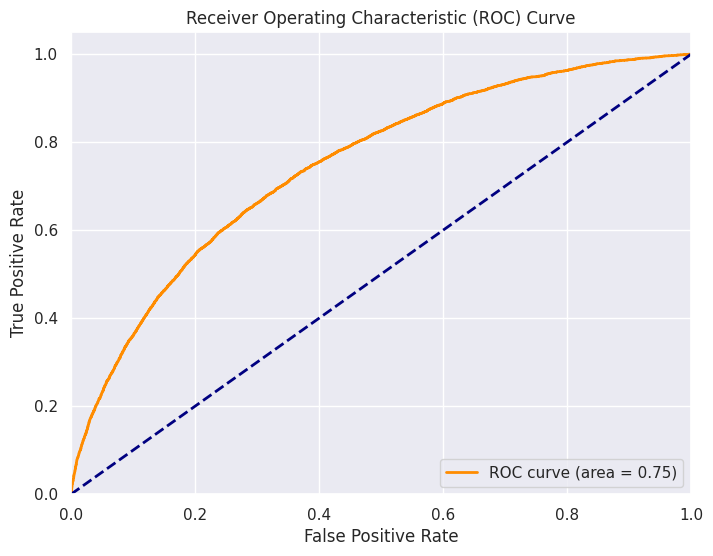

In [ ]:
# prompt: Visualisation de ROC AUC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred_proba_lr are defined from the previous code

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

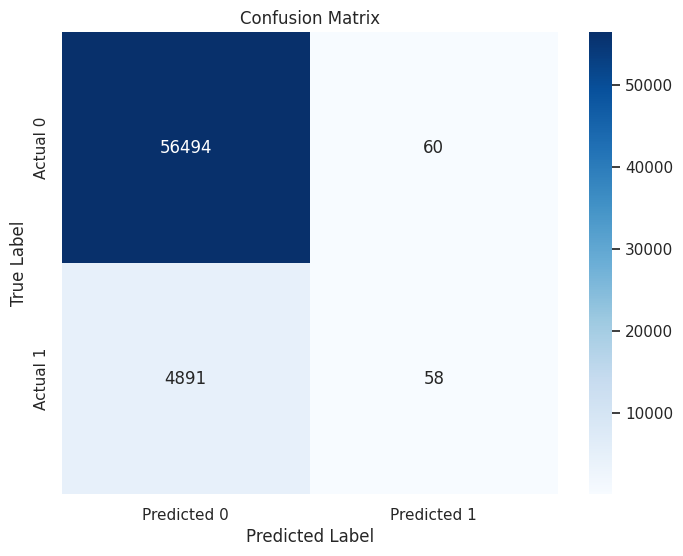

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'y_pred' are defined from the previous code
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import precision_score

precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
print(f"Precision for class 1: {precision_class_1}")

Precision for class 1: 0.4915254237288136


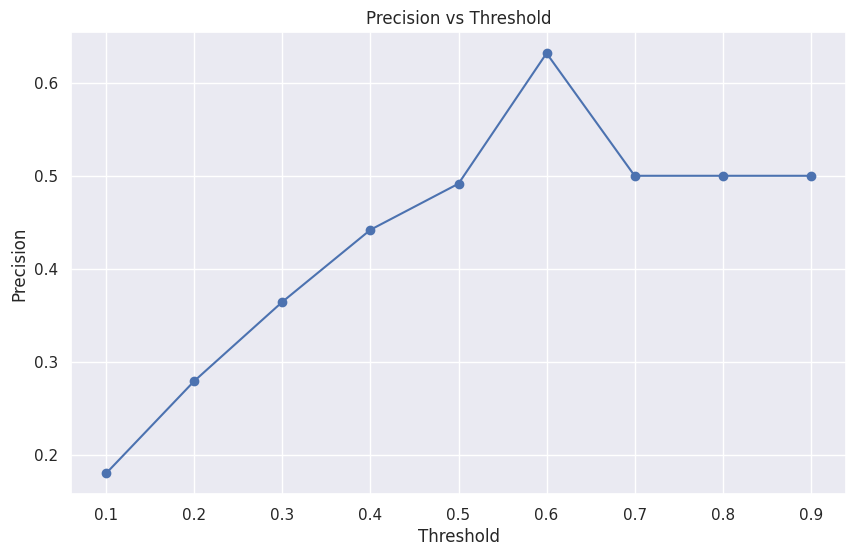

Threshold 0.1: Precision = 0.1806
Threshold 0.2: Precision = 0.2796
Threshold 0.3: Precision = 0.3646
Threshold 0.4: Precision = 0.4420
Threshold 0.5: Precision = 0.4915
Threshold 0.6: Precision = 0.6316
Threshold 0.7: Precision = 0.5000
Threshold 0.8: Precision = 0.5000
Threshold 0.9: Precision = 0.5000


In [ ]:
# Function to calculate precision at different thresholds
def precision_at_threshold(y_true, y_pred_proba, threshold):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Calculate precision
    precision = precision_score(y_true, y_pred, pos_label=1)

    return precision

# Calculate precision for different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = [precision_at_threshold(y_test, y_proba, t) for t in thresholds]

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, marker='o')
plt.title('Precision vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# Print the results
for threshold, precision in zip(thresholds, precisions):
    print(f"Threshold {threshold}: Precision = {precision:.4f}")

#### Recall

Recall (also known as Sensitivity or True Positive Rate) is a metric that measures the proportion of actual positive cases that were correctly identified.
"Of all the actual positive cases, how many did we correctly identify ?"


A low recall means a high number of false negatives

In [ ]:
from sklearn.metrics import recall_score

recall_lr = recall_score(y_test, y_pred)
print(f"Recall Score (Logistic Regression): {recall_lr}")

Recall Score (Logistic Regression): 0.011719539300868862


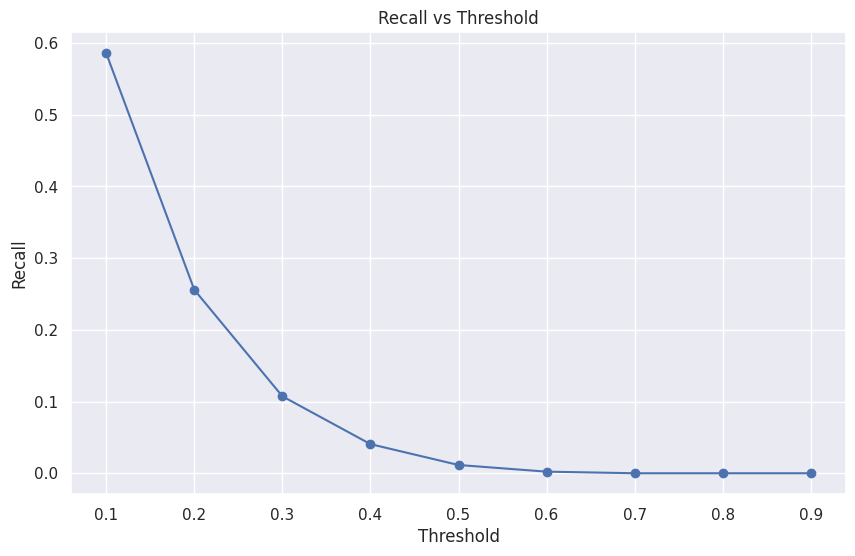

Threshold 0.1: Recall = 0.5858
Threshold 0.2: Recall = 0.2560
Threshold 0.3: Recall = 0.1075
Threshold 0.4: Recall = 0.0408
Threshold 0.5: Recall = 0.0117
Threshold 0.6: Recall = 0.0024
Threshold 0.7: Recall = 0.0002
Threshold 0.8: Recall = 0.0002
Threshold 0.9: Recall = 0.0002


In [ ]:
# Function to calculate recall at different thresholds
def recall_at_threshold(y_true, y_pred_proba, threshold):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Calculate recall
    recall = recall_score(y_true, y_pred, pos_label=1)

    return recall

# Calculate recall for different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
recalls = [recall_at_threshold(y_test, y_proba, t) for t in thresholds]

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, marker='o')
plt.title('Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

# Print the results
for threshold, recall in zip(thresholds, recalls):
    print(f"Threshold {threshold}: Recall = {recall:.4f}")

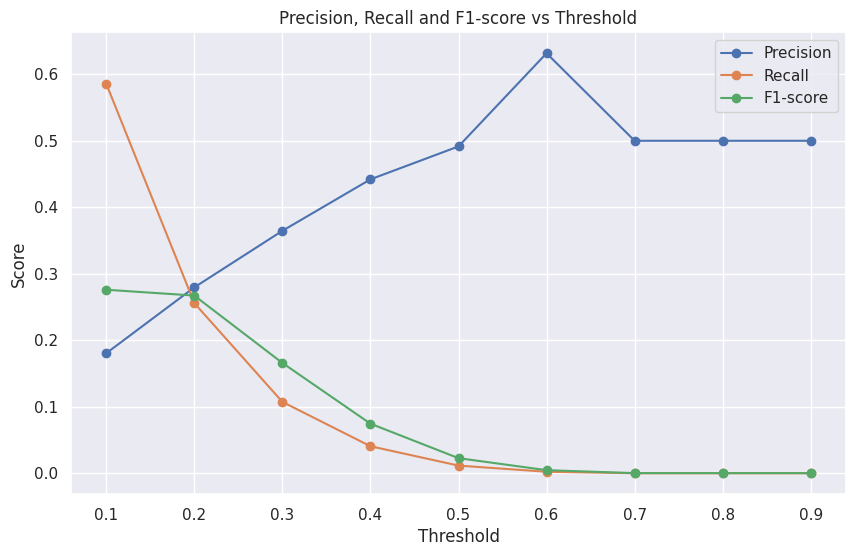

Threshold 0.1: Precision = 0.1806, Recall = 0.5858, F1-score = 0.2761
Threshold 0.2: Precision = 0.2796, Recall = 0.2560, F1-score = 0.2673
Threshold 0.3: Precision = 0.3646, Recall = 0.1075, F1-score = 0.1660
Threshold 0.4: Precision = 0.4420, Recall = 0.0408, F1-score = 0.0747
Threshold 0.5: Precision = 0.4915, Recall = 0.0117, F1-score = 0.0229
Threshold 0.6: Precision = 0.6316, Recall = 0.0024, F1-score = 0.0048
Threshold 0.7: Precision = 0.5000, Recall = 0.0002, F1-score = 0.0004
Threshold 0.8: Precision = 0.5000, Recall = 0.0002, F1-score = 0.0004
Threshold 0.9: Precision = 0.5000, Recall = 0.0002, F1-score = 0.0004


In [ ]:
# prompt: Visualisation de precision recall F1 score sur le meme graphique en fonction du seuil
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def precision_at_threshold(y_true, y_pred_proba, threshold):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    # Calculate precision
    precision = precision_score(y_true, y_pred, pos_label=1)
    return precision

def recall_at_threshold(y_true, y_pred_proba, threshold):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    # Calculate recall
    recall = recall_score(y_true, y_pred, pos_label=1)
    return recall

def f1_at_threshold(y_true, y_pred_proba, threshold):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    # Calculate f1-score
    f1 = f1_score(y_true, y_pred, pos_label=1)
    return f1

# Calculate precision, recall and f1-score for different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = [precision_at_threshold(y_test, y_proba, t) for t in thresholds]
recalls = [recall_at_threshold(y_test, y_proba, t) for t in thresholds]
f1_scores = [f1_at_threshold(y_test, y_proba, t) for t in thresholds]


# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, marker='o', label='Precision')
plt.plot(thresholds, recalls, marker='o', label='Recall')
plt.plot(thresholds, f1_scores, marker='o', label='F1-score')
plt.title('Precision, Recall and F1-score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Print the results
for threshold, precision, recall, f1 in zip(thresholds, precisions, recalls, f1_scores):
    print(f"Threshold {threshold}: Precision = {precision:.4f}, Recall = {recall:.4f}, F1-score = {f1:.4f}")

### LightGBM

- https://stackoverflow.com/questions/49606886/installing-gpu-support-for-lightgbm-on-google-colab/77078844#77078844

In [ ]:
!pip install dask[dataframe] --quiet
!pip uninstall lightgbm -y --quiet
!pip install lightgbm --config-settings=cmake.define.USE_CUDA=ON --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.1 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
print("LightGBM version:", lgb.__version__)

LightGBM version: 4.5.0


In [ ]:
list(range(len(cat_cols)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#### Test

- No preprocessing

In [ ]:
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
model = LGBMClassifier(
    num_leaves=31,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary',
    is_unbalance=True,
    metric='auc',
    random_state=42,
    # categorical_feature=cat_cols,
    verbose=1
)

# Fit the model
model.fit(X_train_prepared, y_train)

# Predict
predictions = model.predict(X_test_prepared)

# Feature importance
print(model.feature_importances_)

[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.240797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6828
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080794 -> initscore=-2.431606
[LightGBM] [Info] Start training from score -2.431606
[ 31   1  36   0  36   9   5  24  28  12 101 643   0   0  10   0   0  13
   0   4   0   0   2   0  11   0   0   0  15   0   0   1   0   1   0   0
   1   0   6   2   1   8   0   4   0   0   0  69  77  33   1   0 106  42
  78  56  57  24  12   3   1   2   6  30  25   9  28 185 145 175  32  32
  27  18  29   7  24  24  16  30  18  21  31  22   2   0  48  51 348  46
   5]


In [ ]:
X_train_prepared.shape

(246008, 91)

In [ ]:
len(model.feature_importances_)

91

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train_prepared.columns,
    'Importance': feature_importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)[:30]

# Display the DataFrame
feature_importance_df

,Feature,Importance
11,ORGANIZATION_TYPE,643
88,RATIO_ANNUITY_CREDIT,348
67,EXT_SOURCE_1,185
69,EXT_SOURCE_3,175
68,EXT_SOURCE_2,145
52,DAYS_BIRTH,106
10,OCCUPATION_TYPE,101
54,DAYS_ID_PUBLISH,78
48,AMT_ANNUITY,77
47,AMT_CREDIT,69


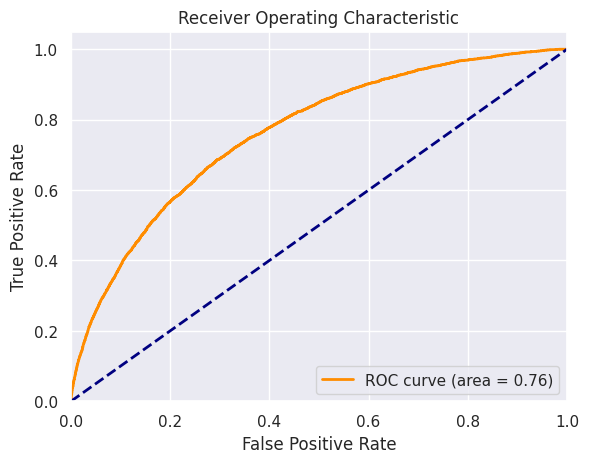

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test contains the true labels for the test set
# and predictions_proba contains the predicted probabilities for the positive class

y_pred_proba = model.predict_proba(X_test_prepared)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

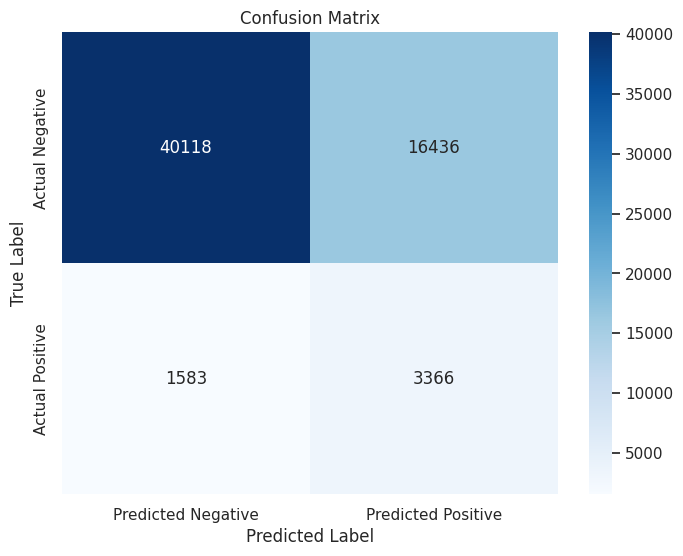

In [ ]:
# prompt: confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' contains the true labels and 'predictions' contains the predicted labels
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Simple

In [ ]:
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pp_cat = Pipeline([
    ('cat_imp', SimpleImputer(strategy='constant', add_indicator=False, fill_value='missing')),
    ('cat_le', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    # ('ohe_cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

pp_binary = Pipeline([
    ('binary_imp', SimpleImputer(strategy='constant', add_indicator=False, fill_value=0))
])

pp_quantity = Pipeline([
    ('quantity_imp', SimpleImputer(strategy='median', add_indicator=False)),
    # ('quantity_rob', RobustScaler())
])

pp_normalized = Pipeline([
    ('normalized_imp', SimpleImputer(strategy='median', add_indicator=False))
])

pp_rating = Pipeline([
    ('rating_imp', SimpleImputer(strategy='most_frequent', add_indicator=False)),
    # ('rating_rob', MinMaxScaler())
])

preprocessor = ColumnTransformer([
    # ('mi', MissingIndicator(), X_train_prepared.columns),
    ('pp_cat', pp_cat, cat_cols),
    ('pp_binary', pp_binary, binary_cols),
    ('pp_quantity', pp_quantity, quantity_cols),
    ('pp_normalized', pp_normalized, normalized_cols),
    ('pp_rating', pp_rating, rating_cols)
])

# Apply the transformations to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train_prepared)

# Check the result (optional)
print(pd.DataFrame(X_train_preprocessed).shape)
pd.DataFrame(X_train_preprocessed).head(2)

(246008, 91)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,0.0,0.0,6.0,2.0,4.0,5.0,1.0,18.0,57.0,0.0,1.0,7.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,555273.0,16366.5,171000.0,0.0,9.0,-23349.0,-3595.0,-4408.0,-1646.0,-2058.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.247211,0.095711,0.029475,0.118507,0.035792,0.524685,0.358568,0.563835,0.0876,0.0763,0.9821,0.7552,0.0211,0.0,0.1379,0.1667,0.2083,0.0483,0.0000,0.0035,0.0687,2.0,2.0
1,1.0,0.0,6.0,4.0,4.0,1.0,1.0,8.0,4.0,2.0,0.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,198085.5,23638.5,157500.0,1.0,0.0,-10921.0,-4281.0,-3399.0,-117.0,-73.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.257686,0.150086,0.119335,0.010713,0.010032,0.244926,0.490305,0.595456,0.0784,0.0633,0.9742,0.6464,0.0266,0.0,0.1379,0.1667,0.2083,0.0409,0.0039,0.0149,0.0645,2.0,2.0


In [ ]:
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from lightgbm import LGBMClassifier


# LightGBM classifier
lgbm = LGBMClassifier(
  objective='binary',
  is_unbalance=True,
  random_state=42,
  # categorical_feature=list(range(len(cat_cols))),
  # categorical_feature=cat_cols,
  n_jobs =-1,
  verbose=1,
)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgbm)
])

In [ ]:
# Fit the pipeline
pipeline.fit(X_train_prepared, y_train)

# Predict on the test set
predictions = pipeline.predict(X_test_prepared)

# Predict probabilities
y_pred_proba = pipeline.predict_proba(X_test_prepared)[:,1]

# Evaluate the model (example: ROC AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc}")

[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6760
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080794 -> initscore=-2.431606
[LightGBM] [Info] Start training from score -2.431606
ROC AUC: 0.7644667763823886


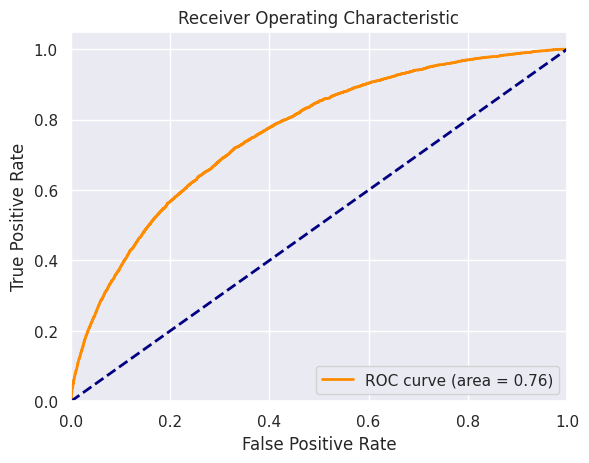

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

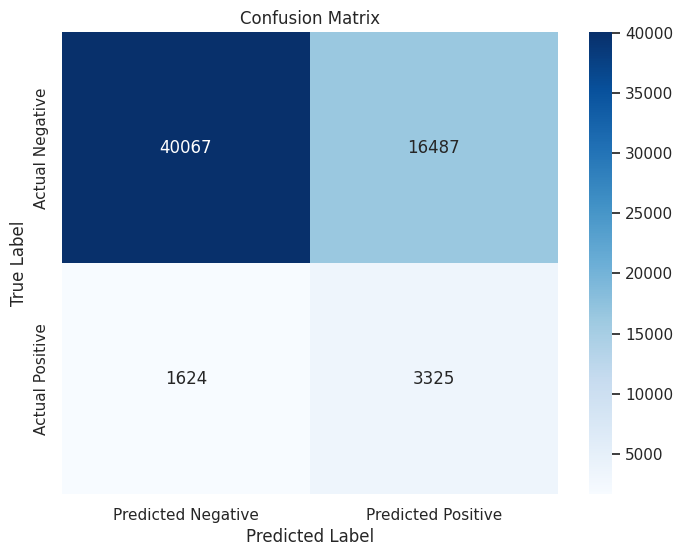

In [ ]:
# prompt: Confusion matrix

# Assuming 'y_test' contains the true labels and 'predictions' contains the predicted labels
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### GridSearchCV

In [ ]:
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from lightgbm import LGBMClassifier


# LightGBM classifier
lgbm = LGBMClassifier(
  objective='binary',
  is_unbalance=True,
  random_state=42,
  # categorical_feature=list(range(len(cat_cols))),  # Use indices of categorical columns
  categorical_feature=cat_cols,
  n_jobs =-1,
  verbose=1,
)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgbm)
])

# Parameter grid for GridSearchCV
param_grid = {
  'classifier__num_leaves': [31, 50, 100],  # Add more options
  'classifier__learning_rate': [0.01, 0.05, 0.1],  # More learning rate options
  'classifier__n_estimators': [100, 200, 300],  # More estimator options
  'classifier__max_depth': [-1, 5, 10],  # Consider adding max_depth
  'classifier__min_child_samples': [20, 50, 100]  # Add child samples parameter
}


# Custom scorer for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, response_method="predict_proba")

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring=roc_auc_scorer
)

# Fit GridSearchCV
grid_search.fit(X_train_prepared, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score on Training Set:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC on Test Set:", test_roc_auc)

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have y_test and y_pred_proba from the previous code
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc_pipeline = Pipeline([
    ('ct_step', ct),
    ('model', DecisionTreeClassifier())
])

dtc_pipeline.fit(X_train_prepared, y_train)
dtc_predictions = dtc_pipeline.predict(X_test_prepared)

print("Decision Tree Classifier Results:")
print(classification_report(y_test, dtc_predictions))

Decision Tree Classifier Results:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     56554
           1       0.15      0.17      0.16      4949

    accuracy                           0.85     61503
   macro avg       0.54      0.54      0.54     61503
weighted avg       0.86      0.85      0.86     61503



In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming y_test contains the true labels and dtc_predictions contains the predicted probabilities
y_pred_proba = dtc_pipeline.predict_proba(X_test_prepared)[:, 1]  # Probability of the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.5418674697353113


## 📈 Étape 2 - Définissez une métrique adaptée à la problématique métier

- Une **fonction de coût métier** mise en place prenant en compte les coûts des faux positifs et des faux négatifs.
- Un score "métier" calculé pour évaluer les performances des différents modèles.

`TARGET` : 1 est "mauvais payeur".

Le modèle prédictif retourne une probabilité que la personne soit un "mauvais payeur" (`TARGET`: 1).

- **Faux positif** : "Mauvais payeur" alors que bon client (moins grave, manque à gagner pour la banque).
- **Faux négatif** : "Bon payeur" alors que "mauvais payeur" (grave pour la banque, risque élevé de ne pas rembourser)


Performance
- ROC AUC : Choix du modèle
- Cout métier : pour déterminer le seuil de refus à partir duquel un client est déclaré "mauvais client". Courbe de (FP + 10 FN) pour chaque valeur de seuil de refus.

**Calcul cout métier :**
- Probabilités prédites
- Seuil
- Classer les bons / mauvais payeurs
- Comparer avec y_test
- Cout métier = FN + (10 x FP)
- Repeter l'opération pour plusieurs seuils
- Tracer la courber
- Trouver le seuil optimal




Ressources :
- https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning

If you want to **avoid false negatives**, you should use a metric that emphasizes the ability of the model to correctly identify **positive cases**. Avoiding false negatives is crucial in scenarios like medical diagnoses, fraud detection, or critical safety applications.

### Key Metrics to Focus On

1. **Recall (Sensitivity or True Positive Rate)**:
   - Formule : **TP / (TP + FN)**
   - High recall means the model correctly identifies most of the actual positives, reducing false negatives.

2. **F2-Score**:
   - A weighted version of the F1-score that gives more importance to recall than precision.
   - Formula:  
     \[
     F2 = (1 + 2^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{(

Le F2 Score est une mesure d'évaluation qui combine la précision et le rappel, en donnant plus de poids au rappel. Voici sa formule :

F2 = (5 * Précision * Rappel) / (4 * Précision + Rappel)

Où :
- Précision = Vrais Positifs / (Vrais Positifs + Faux Positifs)
- Rappel = Vrais Positifs / (Vrais Positifs + Faux Négatifs)

La caractéristique principale du F2 Score est le coefficient 5 pour le rappel, ce qui signifie que les faux négatifs (les cas que le modèle n'a pas correctement identifiés) sont pénalisés plus fortement. Cette formule est particulièrement utile dans les situations où l'on veut minimiser les faux négatifs, comme dans la détection de maladies rares ou la prédiction d'événements critiques.

Comparaison avec d'autres mesures :
- F1 Score utilise un coefficient de 1 (équilibre précision et rappel)
- F2 Score favorise le rappel
- F0.5 Score favoriserait davantage la précision

Pour éviter les faux négatifs, plusieurs métriques et approches peuvent être utilisées :

1. F2 Score
- Comme nous venons de le discuter, le F2 Score pénalise plus lourdement les faux négatifs
- Donne un poids plus important au rappel
- Idéal quand le coût des faux négatifs est élevé

2. Rappel (Sensitivity)
- Mesure directe du taux de vrais positifs
- Calculé comme : Vrais Positifs / (Vrais Positifs + Faux Négatifs)
- Plus le rappel est proche de 1, moins il y a de faux négatifs

3. Courbe ROC et AUC (Area Under the Curve)
- Permet de visualiser les performances du modèle à différents seuils de classification
- Un bon AUC indique une meilleure capacité à distinguer les classes

4. Matrice de confusion
- Permet de visualiser précisément les faux négatifs
- Aide à comprendre où et comment les erreurs se produisent

5. Précision négative
- Mesure la proportion de vrais négatifs parmi tous les cas prédits négatifs
- Complémentaire à la précision positive

Le choix dépend du contexte spécifique et du domaine d'application.

## Étape 3 - Optimisation et évaluation des modèles de Machine Learning

- Tests et comparaison des différents modèles, des plus simples aux plus complexes.
- Utilisation des techniques pour gérer le déséquilibre des classes.
- Maîtrise de l’utilisation des pipelines scikit learn pour l’optimisation et l’évaluation des modèles.

Recommandations :
- Utilisez la **Cross-Validation** pour évaluer les performances des modèles de manière robuste.
- Explorez **différentes valeurs d'hyper paramètres** pour obtenir des modèles performants à l’aide de **Grid Search**.
- Synthétisez vos résultats (tableau comparatif + courbe ROC)

Ressources :
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- https://imbalanced-learn.org/stable/

## Étape 4 - Développez un module d’explicabilité de votre modèle de Machine Learning

>  Analyse de l’importance des variables globale au modèle, mais également locale pour un client donné.

- Utilisation des librairies spécialisées pour calculer la **feature importance** globale et locale.
- Informations fournies pour expliquer les prédictions du modèle aux chargés d'étude.

Ressources

- Utilisez les librairies SHAP ou LIME pour comprendre et mettre en œuvre l'analyse de la feature importance.

SHAP (Shapley Additive exPlanations) : Cette méthode attribue une valeur SHAP à chaque caractéristique pour chaque observation, permettant d'expliquer les prédictions individuelles.

**Documentation** :
- https://towardsdatascience.com/interpretability-in-machine-learning-70c30694a05f
- https://christophm.github.io/interpretable-ml-book/
- https://www.aquiladata.fr/insights/interpretabilite-des-modeles-de-machine-learning/
- https://datacorner.fr/feature-importance/

---


**Gemini**

**Comprendre l'importance des variables dans un modèle de machine learning est crucial pour plusieurs raisons :**

* **Interprétation du modèle :** Cela permet de comprendre quelles caractéristiques influencent le plus les prédictions.
* **Sélection de variables :** Identifier les variables les plus pertinentes pour réduire la complexité du modèle et améliorer ses performances.
* **Amélioration des performances :** En se concentrant sur les variables les plus importantes, on peut affiner les algorithmes et les hyperparamètres.

**Plusieurs méthodes permettent d'évaluer l'importance des variables :**

### Méthodes intrinsèques aux algorithmes

* **Coefficients dans les modèles linéaires :** L'amplitude et le signe des coefficients indiquent l'impact de chaque variable sur la variable cible.
* **Importance des variables dans les arbres de décision :** Les algorithmes comme Random Forest ou XGBoost attribuent un score d'importance à chaque variable en fonction de sa contribution à la réduction de l'impureté dans les nœuds de l'arbre.
* **SHAP (Shapley Additive exPlanations) :** Cette méthode attribue une valeur SHAP à chaque caractéristique pour chaque observation, permettant d'expliquer les prédictions individuelles.

### Méthodes par permutation

* **Permutation Importance :** On mesure la diminution de performance du modèle lorsqu'on permute aléatoirement les valeurs d'une variable donnée. Plus la baisse de performance est importante, plus la variable est considérée comme importante.

### Choisir la bonne méthode

Le choix de la méthode dépend de plusieurs facteurs :

* **Nature du modèle :** Les méthodes intrinsèques sont plus adaptées à certains algorithmes (régression linéaire, arbres de décision).
* **Type de données :** Les variables catégorielles et numériques peuvent être traitées différemment.
* **Objectif de l'analyse :** Si l'objectif est d'expliquer les prédictions individuelles, SHAP est plus approprié. Pour une vue globale de l'importance des variables, la permutation importance peut être utilisée.


**Visualisation des résultats**

Pour une meilleure compréhension, il est recommandé de visualiser les résultats sous forme de graphiques (barplot, heatmap).

**Points importants à retenir :**

* **Corrélation entre variables :** Si deux variables sont fortement corrélées, il peut être difficile d'isoler leur effet individuel.
* **Interprétation contextuelle :** L'importance d'une variable doit être interprétée dans le contexte du problème métier.
* **Combinaison de méthodes :** Il est souvent utile de combiner plusieurs méthodes pour obtenir une vision plus complète de l'importance des variables.

**En conclusion,** l'évaluation de l'importance des variables est une étape essentielle dans la construction et l'interprétation des modèles de machine learning. En choisissant les bonnes méthodes et en combinant les résultats, il est possible d'obtenir des insights précieux sur les données et d'améliorer la qualité des prédictions.